In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import SD_Project as SD
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import datetime

import matplotlib.cm as cm
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.metrics import r2_score
from scipy.stats import ttest_ind   
register_matplotlib_converters()
#SD.plot_scatter_errorbars_color_correlation?
def linefitline(b):
    return intercept + slope * b

In [2]:
##Download ERA5 reanaysis data
import cdsapi

c = cdsapi.Client(url= 'https://cds.climate.copernicus.eu/api/v2',
key= '24891:44aabe89-39a3-4335-8bb4-be18ae02be29')

c.retrieve(
    'reanalysis-era5-pressure-levels',
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',
        'variable': [
            'relative_humidity', 'specific_humidity', 'temperature',
            'u_component_of_wind', 'v_component_of_wind',
        ],
        'pressure_level': '1000',
        'year': '2019',
        'month': '01',
        'day': '01',
        'time': '00:00',
    },
    'downloadERA5.nc')

2020-07-02 11:28:46,995 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
C:\Users\Hanna\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
2020-07-02 11:28:47,663 INFO Request is queued
C:\Users\Hanna\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
2020-07-02 11:28:48,766 INFO Request is running
C:\Users\Hanna\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly 

Result(content_length=10393308,content_type=application/x-netcdf,location=http://136.156.132.110/cache-compute-0001/cache/data4/adaptor.mars.internal-1593682128.007859-23693-7-a2e32665-55ca-4aa5-85ba-b07def38bb61.nc)

In [2]:
#import DATA SET OOI and SD
import xarray as xr
import numpy as np 
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
filepath1= 'D:/Studium_der_Physik/M.Sc/Oceanography_Master/Masterthesis/Data/OOI_mooring_deployment0004_GS01SUMO-RID16-04-VELPTA000-telemetered-velpt_ab_dcl_instrument_20190601T180000-20190805T000000.nc'
OOI = xr.open_dataset(filepath1)

#filepath2= 'D:/Studium_der_Physik/M.Sc/Oceanography_Master/Masterthesis/Data/deployment0004_GS01SUMO-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20190601T000002.718000-20190730T235954.252000.nc'
#OOI_met = xr.open_dataset(filepath2)

import xarray as xr
import numpy as np 
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
filepath= 'D:/Studium_der_Physik/M.Sc/Oceanography_Master/Masterthesis/SD_data/1023_new_merged.nc'
DS= xr.open_dataset(filepath)


In [12]:
np.std(OOI['sea_surface_temperature'])

<xarray.DataArray 'sea_surface_temperature' ()>
array(0.19100476)

In [34]:
import numpy as np 
n=np.arange(0,100,1)
N=9000
f= 1/np.sqrt(N-(n-1))


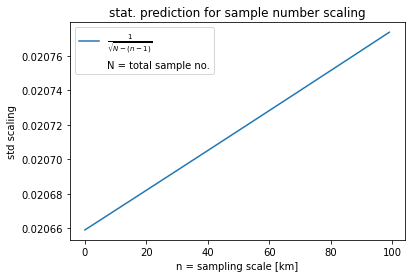

In [68]:
import matplotlib.pyplot as plt
plt.plot(n, (1.960*f), label=r'$\frac{1}{\sqrt{N-(n-1)}}$')   # scale with 1.960 to get 95% confidence interval
plt.plot(0, 1.960*f[0], label='N = total sample no.',linewidth=0) 
#plt.plot(n, (-(1.960*f)))
plt.title('stat. prediction for sample number scaling')
plt.xlabel('n = sampling scale [km]')
plt.ylabel('std scaling')
plt.legend()
plt.savefig("stat_pred_suggestion.jpg", bbox_inches='tight',transparent=True)

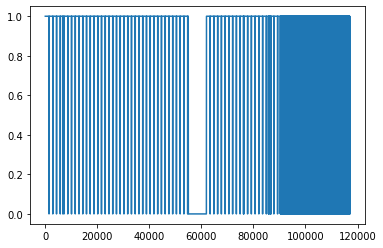

In [60]:
plt.plot(np.isfinite(DS.TEMP_CTD_RBR_MEAN[:-20000]))

In [68]:
np.array(DS.TEMP_CTD_RBR_MEAN)[90338:90600]

array([4.549, 4.549, 4.541,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan, 4.554,   nan,   nan,   nan,   nan, 4.638,
         nan,   nan,   nan,   nan, 4.683,   nan,   nan,   nan,   nan,
       4.708,   nan,   nan,   nan,   nan, 4.707,   nan,   nan,   nan,
         nan, 4.709,   nan,   nan,   nan,   nan, 4.698,   nan,   nan,
         nan,   nan, 4.706,   nan,   nan,   nan,   nan, 4.707,   nan,
         nan,   nan,   nan, 4.694,   nan,   nan,   nan,   nan, 4.692,
         nan,   nan,   nan,   nan, 4.676,   nan,   nan,   nan,   nan,
       4.636,   nan,   nan,   nan,   nan, 4.607,   nan,   nan,   nan,
         nan, 4.576,   nan,   nan,   nan,   nan, 4.539,   nan,   nan,
         nan,   nan, 4.482,   nan,   nan,   nan,   nan, 4.441,   nan,
         nan,   nan,   nan, 4.424,   nan,   nan,   nan,   nan, 4.414,
         nan,   nan,   nan,   nan, 4.403,   nan,   nan,   nan,   nan,
       4.397,   nan,   nan,   nan,   nan, 4.394,   nan,   nan,   nan,
         nan, 4.389,

(737199.0, 737284.375)

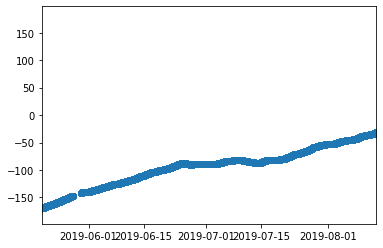

In [4]:
#np.where(np.array(DS.time) == np.datetime64(datetime.datetime(2019, 8,13,9,0,0)))
plt.scatter(np.array(DS.time), DS.longitude)
plt.xlim(np.datetime64(datetime.datetime(2019, 5,20,0,0,0)),np.datetime64(datetime.datetime(2019, 8,13,9,0,0)))

In [26]:
a= np.where(DS.time==np.datetime64(datetime.datetime(2019, 8,13,0,0,0)))
a[0][0]

133864

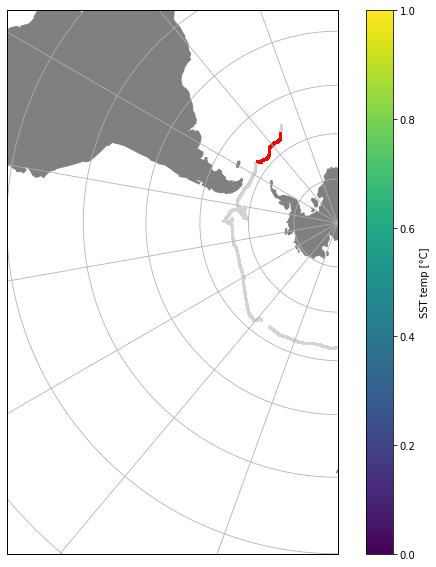

In [5]:
import cartopy
import cartopy.crs as ccrs
import matplotlib as mpl
fig = plt.figure(figsize=[10,10])
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, -50, -90, 0], ccrs.PlateCarree())

x= DS.longitude
y=DS.latitude
s_1= np.where(DS.time==np.datetime64(datetime.datetime(2019, 8,1,0,0,0)))
s_2= np.where(DS.time==np.datetime64(datetime.datetime(2019, 8,13,0,0,0)))
s1= s_1[0][0]
s2= s_2[0][0]
z = DS.TEMP_CTD_RBR_MEAN
x_m=-89.3567
y_m=-54.4076

cmap = mpl.cm.Blues
h1=ax.scatter(x, y, color='lightgrey', s=.5,transform=ccrs.PlateCarree())
h1=ax.scatter(x[s1:s2], y[s1:s2], color='red', s=.5,transform=ccrs.PlateCarree())
#h1=ax.scatter(x, y, c=z, s=.5,transform=ccrs.PlateCarree())#, vmin=-40, vmax=60)
#h1= ax.scatter(x_m, y_m, s= 25, color='black',transform=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, color='grey')
#plt.title('Sensible heat flux, SD 1020')
#ax.gridlines()
gl = ax.gridlines(draw_labels=False, xlocs=None, ylocs=None)
gl.n_steps = 90
#sm = plt.cm.ScalarMappable(norm=plt.Normalize(np.min(z),np.max(z)))#cmap=cmap,
#sm._A = []
plt.colorbar(h1,ax=ax,label='SST temp [°C]',shrink=1)

# Wind direction & heading

In [6]:
SD_heading= DS.HDG

In [3]:
u= [1,0,1]#DS.UWND_MEAN
v= [0,1,1]#DS.VWND_MEAN
u_1=np.array(u)
v_1= np.array(v)
def wind_dir_deg(u,v):
    import metpy
    wind_abs = np.sqrt(u**2 + v**2)
    wind_dir_trig_to = np.arctan2(u/wind_abs, v/wind_abs) 
    wind_dir_trig_to_degrees = wind_dir_trig_to * 180/np.pi ## -111.6 degrees
    #Then you must convert this wind vector to the meteorological convention of the direction the wind is coming from:
    wind_dir_trig_from_degrees = wind_dir_trig_to_degrees + 180 ## 68.38 degrees
    
    return wind_dir_trig_from_degrees
wind_dir_deg(u_1,v_1)
SD_wind_dir = wind_dir_deg(DS.UWND_MEAN, DS.VWND_MEAN)

# MAP

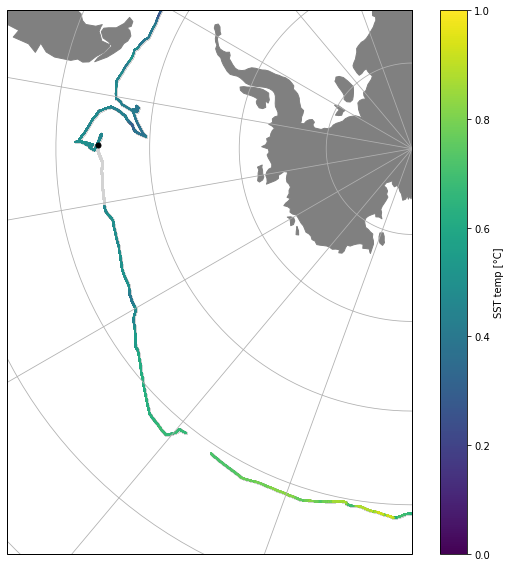

In [4]:
import cartopy
import cartopy.crs as ccrs
import matplotlib as mpl

fig = plt.figure(figsize=[10,10])
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, -70, -90, -45], ccrs.PlateCarree())

x= DS.longitude
y=DS.latitude
z = DS.TEMP_CTD_RBR_MEAN
x_m=-89.3567
y_m=-54.4076

cmap = mpl.cm.Blues
h1=ax.scatter(x, y, color='lightgrey', s=.5,transform=ccrs.PlateCarree())
h1=ax.scatter(x, y, c=z, s=.5,transform=ccrs.PlateCarree())#, vmin=-40, vmax=60)
h1= ax.scatter(x_m, y_m, s= 25, color='black',transform=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, color='grey')
#plt.title('Sensible heat flux, SD 1020')
#ax.gridlines()
gl = ax.gridlines(draw_labels=False, xlocs=None, ylocs=None)
gl.n_steps = 90
#sm = plt.cm.ScalarMappable(norm=plt.Normalize(np.min(z),np.max(z)))#cmap=cmap,
#sm._A = []
plt.colorbar(h1,ax=ax,label='SST temp [°C]',shrink=1)
#plt.savefig("SD1023_Map_path_mooring.pdf", bbox_inches='tight',transparent=True)

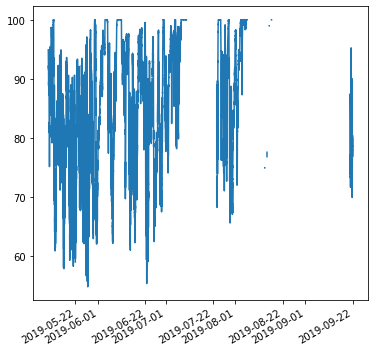

In [4]:
#plt.plot(OOI.time,OOI.relative_humidity)
#plt.plot(DS.time,DS.RH_MEAN)
fig = plt.figure(figsize=[6,6])
plt.plot(DS.time,DS.RH_MEAN) 
fig.autofmt_xdate()
#plt.xlim(datetime.datetime(2019, 6,29,21,0,0), datetime.datetime(2019, 6, 30,4,0,0))
#plt.ylim(5,6)


# zoom in data gaps

(5, 8)

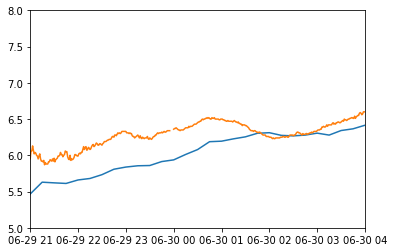

In [180]:
plt.plot(OOI.time,OOI.air_temperature)
plt.plot(DS.time,DS.TEMP_AIR_MEAN)
plt.xlim(datetime.datetime(2019, 6,29,21,0,0), datetime.datetime(2019, 6, 30,4,0,0))
plt.ylim(5,8)

(737239.875, 737240.1666666666)

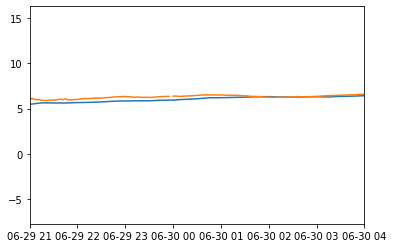

In [181]:
plt.plot(OOI.time,OOI.air_temperature)
plt.plot(DS.time,DS.TEMP_AIR_MEAN)
plt.xlim(datetime.datetime(2019, 6,29,21,0,0), datetime.datetime(2019, 6, 30,4,0,0))

# distance SD to OOI mooring

In [6]:
import mpu
x= DS.latitude[62720:84160] # len= 1440 = 24hours when Sd is closest to mooring
y= DS.longitude[62720:84160]
y_m= np.zeros(len(x))
x_m= np.zeros(len(x))
y_m[:]=-89.3567 #lon
x_m[:]=-54.4076 #lat

dist3=np.zeros(len(x))


# What you were looking for
for i in range (0, len(x)):
#dist[i] = mpu.haversine_distance((x[i], y[i]), (x_m[i], y_m[i]))
#print(dist)  # gives 278.45817507541943.
    dist3[i] = mpu.haversine_distance((x[i], y[i]), (x_m[i], y_m[i]))

for i in range (0, len(x)):
#dist[i] = mpu.haversine_distance((x[i], y[i]), (x_m[i], y_m[i]))
#print(dist)  # gives 278.45817507541943.
    dist3[i] = mpu.haversine_distance((x[i], y[i]), (x_m[i], y_m[i]))
#dist

In [5]:
import mpu
x= DS.latitude[40000:80000] # len= 1440 = 24hours when Sd is closest to mooring
y= DS.longitude[40000:80000]
y_m= np.zeros(len(x))
x_m= np.zeros(len(x))
y_m[:]=-89.3567 #lon
x_m[:]=-54.4076 #lat

dist=np.zeros(len(x))
for i in range (0, len(x)):
#dist[i] = mpu.haversine_distance((x[i], y[i]), (x_m[i], y_m[i]))
#print(dist)  # gives 278.45817507541943.
    dist[i] = mpu.haversine_distance((x[i], y[i]), (x_m[i], y_m[i]))
#dist
distance_15min= dist[::15]


In [6]:
np.min(dist)

0.4605214764274406

In [16]:
np.abs(np.diff(DS.TEMP_CTD_RBR_MEAN)[40000:80000])/dist

array([0.00000000e+00, 8.64501127e-07, 4.32275823e-07, ...,
       5.14667390e-06, 0.00000000e+00, 7.71765792e-06])

# shortest distance to mooring 

In [17]:
np.where(dist == np.min(dist) )
SD_ctd_temp_short[21903]

<xarray.DataArray 'TEMP_CTD_RBR_MEAN' ()>
array(nan)
Coordinates:
    time        datetime64[ns] 2019-06-23T23:48:00
    trajectory  float32 ...
Attributes:
    standard_name:              sea_water_temperature
    long_name:                  Seawater temperature
    units:                      degrees_c
    last_calibrated:            2018-11-08
    update_period:              500
    device_name:                RBR CTD/ODO/Chl-A (40743)
    installed_date:             2019-03-07T19:12:51.642264Z
    nominal_sampling_schedule:  12s on, 48s off, centered at :00
    installed_height:           -0.53
    serial_number:              40743
    vendor_name:                RBR
    model_name:                 Saildrone^3

# 250km Correlation vs. distance to mooring

In [8]:
# when does the correlation drop off? 

time_short= DS.time[40000:80000]

dist_short2 = dist[20011:34994]
time_short2 = time_short[20011:34994]

SD_airtemp_short = DS.TEMP_AIR_MEAN[40000:80000]
SD_ctd_temp_short = DS.TEMP_CTD_RBR_MEAN[40000:80000]
SD_pres_short = DS.BARO_PRES_MEAN[40000:80000]
SD_wind_long = SD.wind(DS.UWND_MEAN,DS.VWND_MEAN)
SD_wind_short= SD_wind_long[40000:80000]


SD_airtemp_short2 = SD_airtemp_short[20011:34994]
SD_ctdtemp_short2 = SD_ctd_temp_short[20011:34994]
SD_pres_short2 = SD_pres_short[20011:34994]
SD_wind_short2 = SD_wind_short[20011:34994]
SD_wind_dir_short2= SD_wind_dir[20011:34994]

n = np.arange(0, 14983, 15)
# sum every 60 index together 

SD_pres_short2_15min = []
SD_airtemp_short2_15min = []
SD_wind_short2_15min = []
SD_ctdtemp_short2_15min = []


SD_pres_short2_15min_std = []
SD_airtemp_short2_15min_std = []
SD_wind_short2_15min_std = []
SD_ctdtemp_short2_15min_std = []
SD_wind_dir_short2_15min_std = []

for i in n:
    SD_pres_short2_15min.append(np.nanmean(SD_pres_short2[i:i+14]))
    SD_airtemp_short2_15min.append(np.nanmean(SD_airtemp_short2[i:i+14]))
    SD_wind_short2_15min.append(np.nanmean(SD_wind_short2[i:i+14]))
    SD_ctdtemp_short2_15min.append(np.nanmean(SD_ctdtemp_short2[i:i+14]))
   
    
    SD_pres_short2_15min_std.append(np.nanstd(SD_pres_short2[i:i+14]))
    SD_airtemp_short2_15min_std.append(np.nanstd(SD_airtemp_short2[i:i+14]))
    SD_wind_short2_15min_std.append(np.nanstd(SD_wind_short2[i:i+14]))
    SD_ctdtemp_short2_15min_std.append(np.nanstd(SD_ctdtemp_short2[i:i+14]))
#plt.plot(time_short[20000:35000])


C:\Users\Hanna\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: Mean of empty slice
C:\Users\Hanna\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [9]:
#np.where(dist == np.min(dist))
#SD_ctd_temp_short[21910:22002]
#dist[21910]


In [21]:
# find indx start time, stop time, where SD is in 100km radius 
b2 = np.where(np.array(OOI.time) == np.datetime64(datetime.datetime(2019, 6, 22, 16, 15, 0)))
start = np.int(b2[0])
c2 = np.where(np.array(OOI.time) == np.datetime64(datetime.datetime(2019, 7, 3, 2, 0, 0)))
stop = np.int(c2[0])

# cut OOI data accordingly
OOI_time_e = OOI.time[start+1: stop+1] # 19.6.2019 12:15 - 30.6.2019 22:45

OOI_airtemp_e = OOI.air_temperature[start+1: stop+1]
OOI_ctdtemp_e = OOI.sea_surface_temperature[start+1: stop+1]
OOI_wind_e = OOI.met_relwind_speed[start+1: stop+1]
OOI_pres_e = OOI.barometric_pressure[start+1: stop+1]

u= np.diff(OOI_time_e)
a= np.array(u, dtype=float)
w= np.where(a==0)

f= np.append(a, 2)
#np.delete (OOI_ctdtemp, w)
OOI_time2 = OOI_time_e[f!=0]
OOI_ctdtemp2 = OOI_ctdtemp_e[f!=0]
OOI_wind2 = OOI_wind_e[f!=0]
OOI_pres2 = OOI_pres_e[f!=0]
OOI_airtemp2 = OOI_airtemp_e[f!=0]

# Compare closest point SST

In [11]:
distance2_15=dist_short2[::15]
#len(distance2_15)
#print(OOI_ctdtemp2[126])
#print(distance2_15[126])

In [15]:
np.where(distance2_15== np.min(distance2_15))
#print(SD_ctdtemp_short2_15min[127])
#print(SD_ctdtemp_short2_15min_std[128])
#print(OOI_ctdtemp2[126])

(array([126], dtype=int64),)

# bin loop to find correlations in 10km bins 


Text(0, 0.5, 'n')

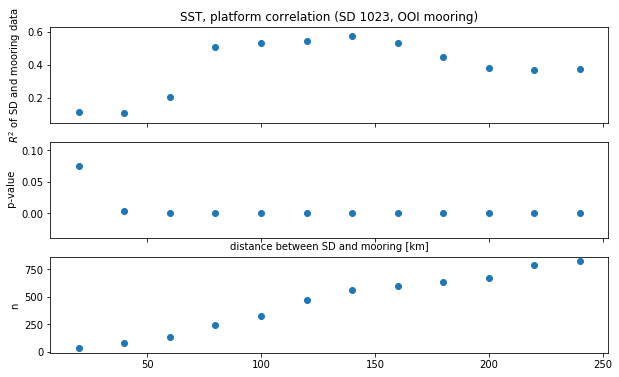

In [10]:
# CTD TEMP 
binn = np.arange(20, 250, 20)
ctd_temp_R_sqrt = []
ctd_temp_p_value = []
n_length = []
for v in binn:
    #indx= np.where(distance2_15 < v and distance2_15 > v-10)
    x1 = np.array(OOI_ctdtemp2[(distance2_15 < v)])
    y1 = np.array(SD_ctdtemp_short2_15min)[(distance2_15 < v)]
    x= x1[~np.isnan(y1)]
    y= y1[~np.isnan(y1)]
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    #line1=linefitline(x1)
    r2 = r2_score(y, linefitline(x))
    ctd_temp_R_sqrt.append(r2)
    ctd_temp_p_value.append(p_value)
    n_length.append(len(x))
fig, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True,figsize=[10,6])
ax1.scatter(binn, ctd_temp_R_sqrt)
ax2.scatter(binn, ctd_temp_p_value)
ax2.set_ylabel('')
ax1.set_ylabel('$R^2$ of SD and mooring data')
ax1.set_title('SST, platform correlation (SD 1023, OOI mooring)')
ax2.set_xlabel('distance between SD and mooring [km]')
ax2.set_ylabel(' p-value')
ax3.scatter(binn, n_length)
ax3.set_ylabel('n')
#plt.savefig("SD1023_mooring_correlation_distance_SST_communlative_20.pdf", bbox_inches='tight',transparent=True)

Text(0, 0.5, 'n')

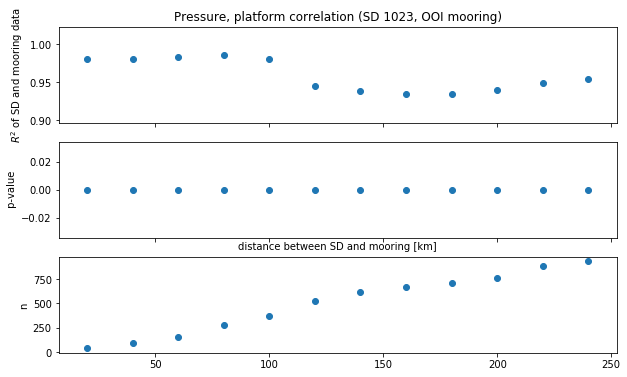

In [17]:
# PRESSURE 
binn = np.arange(20, 250,20)
pres_R_sqrt= []
pres_p_value= []
n_length = []
for v in binn:
    #indx= np.where(distance2_15 < v)[0]
    x1 = np.array(OOI_pres2 [(distance2_15 < v)])
    y1 = np.array(SD_pres_short2_15min)[(distance2_15 < v)]
    #y1 = np.array(SD_ctdtemp_short2_15min)[(distance2_15 < v) &  (distance2_15 > v-10)]
    x= x1[~np.isnan(y1)]
    y= y1[~np.isnan(y1)]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    #line1=linefitline(x1)
    r2 = r2_score(y, linefitline(x))
    pres_R_sqrt.append(r2)
    pres_p_value.append(p_value)
    n_length.append(len(x))
    
fig, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True,figsize=[10,6])
ax1.scatter(binn, pres_R_sqrt)
ax2.scatter(binn, pres_p_value)
ax1.set_ylabel('$R^2$ of SD and mooring data')
ax1.set_title('Pressure, platform correlation (SD 1023, OOI mooring)')
ax2.set_xlabel('distance between SD and mooring [km]')
ax2.set_ylabel(' p-value')
ax3.scatter(binn, n_length)
ax3.set_ylabel('n')
#plt.savefig("SD1023_mooring_correlation_distance_pres_commulative_20.pdf", bbox_inches='tight',transparent=True)

Text(0, 0.5, 'n')

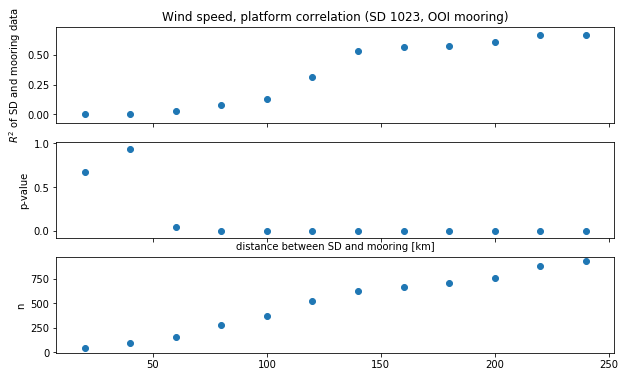

In [11]:
#WIND 

# PRESSURE 
binn = np.arange(20, 250,20)
wind_R_sqrt= []
wind_p_value= []
n_length = []
for v in binn:
    indx= np.where(distance2_15 < v)[0]
    x1 = np.array(OOI_wind2[(distance2_15 < v)])
    y1 = np.array(SD_wind_short2_15min)[(distance2_15 < v)]
    x= x1[~np.isnan(x1)]
    y= y1[~np.isnan(x1)]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    #line1=linefitline(x1)
    r2 = r2_score(y, linefitline(x))
    wind_R_sqrt.append(r2)
    wind_p_value.append(p_value)
    n_length.append(len(x))
    
fig, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True,figsize=[10,6])
ax1.scatter(binn, wind_R_sqrt)
ax2.scatter(binn, wind_p_value)
ax1.set_ylabel('$R^2$ of SD and mooring data')
ax1.set_title('Wind speed, platform correlation (SD 1023, OOI mooring)')
ax2.set_xlabel('distance between SD and mooring [km]')
ax2.set_ylabel('p-value')
ax3.scatter(binn, n_length)
ax3.set_ylabel('n')
#plt.savefig("SD1023_mooring_correlation_distance_wind_commulative_20.pdf", bbox_inches='tight',transparent=True)

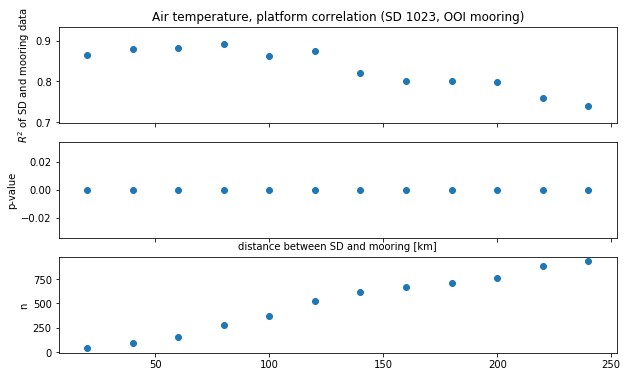

In [35]:
#AIR TEMP

# PRESSURE 
binn = np.arange(20, 250, 20)
air_temp_R_sqrt= []
air_temp_p_value= []
n_length=[]
for v in binn:
    indx= np.where(distance2_15 < v)[0]
    x1 = np.array(OOI_airtemp2[(distance2_15 < v)])
    y1 = np.array(SD_airtemp_short2_15min)[(distance2_15 < v)]
    x= x1[~np.isnan(x1)]
    y= y1[~np.isnan(x1)]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    #line1=linefitline(x1)
    r2 = r2_score(y, linefitline(x))
    air_temp_R_sqrt.append(r2)
    air_temp_p_value.append(p_value)
    n_length.append(len(x))
    
fig, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True,figsize=[10,6])
ax1.scatter(binn, air_temp_R_sqrt)
ax2.scatter(binn, air_temp_p_value)
ax1.set_ylabel('$R^2$ of SD and mooring data')
ax1.set_title('Air temperature, platform correlation (SD 1023, OOI mooring)')
ax2.set_xlabel('distance between SD and mooring [km]')
ax2.set_ylabel('p-value')
ax3.scatter(binn, n_length)
ax3.set_ylabel('n')
#plt.savefig("SD1023_mooring_correlation_distance_airtemp_commulative_20.pdf", bbox_inches='tight',transparent=True)

# under 100 km correlation

Text(0, 0.5, 'distance between mooring and SD [km]')

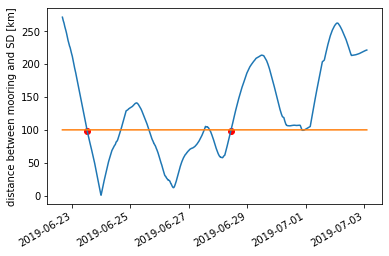

In [22]:

p=np.zeros(40000) 
p[:]=100
a = np.where(np.array(dist)<100)
b = a[0]
time_short= DS.time[40000:80000]
fig = plt.figure(figsize=[6,4])
plt.plot(time_short[20000:35000],dist[20000:35000])
plt.plot(time_short[20000:35000],p[20000:35000])
plt.scatter(np.array(time_short[np.int(b[0])+14]), dist[np.int(b[0])+14], c='r')
plt.scatter(np.array(time_short[28312-7]), dist[28312-7], c= 'r')
fig.autofmt_xdate()
plt.ylabel('distance between mooring and SD [km]')
#plt.savefig("SD1023_distance_mooring_SD.pdf", bbox_inches='tight',transparent=True)

In [12]:
# determine the threshold for comaprison: assuming 100km distance here
a = np.where(np.array(dist)<100)
b = a[0]
v_min = np.int(b[0])+14 #= 21221+14
v_max = 28312-7 #= 31927-6

SD_heading= DS.HDG
#cut SD data accordingly 

SD_airtemp_short = DS.TEMP_AIR_MEAN[40000:80000]
SD_ctd_temp_short = DS.TEMP_CTD_RBR_MEAN[40000:80000]
SD_pres_short = DS.BARO_PRES_MEAN[40000:80000]
SD_wind_long = SD.wind(DS.UWND_MEAN,DS.VWND_MEAN)
SD_wind_short = SD_wind_long[40000:80000]
SD_wind_dir_short= SD_wind_dir[40000:80000]
SD_heading_short = SD_heading[40000:80000]

SD_time_u100 = time_short[v_min:v_max] 
SD_airtemp_u100 = SD_airtemp_short[v_min:v_max] 
SD_ctdtemp_u100 = SD_ctd_temp_short[v_min:v_max] 
SD_pres_u100 = SD_pres_short[v_min:v_max] 
SD_wind_dir_u100 = SD_wind_dir_short[v_min:v_max] 
SD_heading_u100 = SD_heading_short[v_min:v_max] 
dist_u100 = dist[v_min:v_max]
#Correcting wind to 10m reference height from Schmidt et. al. 2017
Z = 10 # refrence height in m 
zo = 1.52e-4 # roughness length [m]
zm = 5.2 # measuremnt height [m] of sensor on Saildrone

SD_wind_10m = SD_wind_short#*(np.log(Z/zo)/np.log(zm/zo))
SD_wind_10m_u100 = SD_wind_10m[v_min: v_max] 

distance_15min= dist_u100[::15]
# resolution of Sd data needs to be adjusted with hourly mean and std as error bar 

l = np.arange(0, 7080, 15)
# sum every 60 index together 

SD_pres_u100_15min = []
SD_airtemp_u100_15min = []
SD_wind_u100_15min = []
SD_ctdtemp_u100_15min = []
SD_wind_dir_u100_15min = []
SD_heading_u100_15min = []

SD_pres_u100_15min_std = []
SD_airtemp_u100_15min_std = []
SD_wind_u100_15min_std = []
SD_ctdtemp_u100_15min_std = []

for i in l:
    SD_pres_u100_15min.append(np.nanmean(SD_pres_u100[i:i+14]))
    SD_airtemp_u100_15min.append(np.nanmean(SD_airtemp_u100[i:i+14]))
    SD_wind_u100_15min.append(np.nanmean(SD_wind_10m_u100[i:i+14]))
    SD_ctdtemp_u100_15min.append(np.nanmean(SD_ctdtemp_u100[i:i+14]))
    SD_wind_dir_u100_15min.append(np.nanmean(SD_wind_dir_u100[i:i+14]))
    SD_heading_u100_15min.append(np.nanmean(SD_heading_u100[i:i+14]))
    
    SD_pres_u100_15min_std.append(np.nanstd(SD_pres_u100[i:i+14]))
    SD_airtemp_u100_15min_std.append(np.nanstd(SD_airtemp_u100[i:i+14]))
    SD_wind_u100_15min_std.append(np.nanstd(SD_wind_10m_u100[i:i+14]))
    SD_ctdtemp_u100_15min_std.append(np.nanstd(SD_ctdtemp_u100[i:i+14]))

C:\Users\Hanna\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: Mean of empty slice
C:\Users\Hanna\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [21]:
np.nanmean(SD_ctdtemp_u100)

5.9420867314931

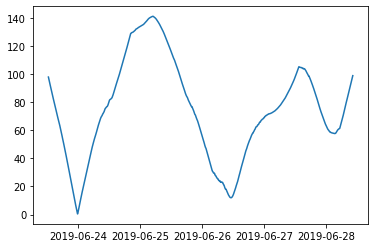

In [199]:
plot(SD_time_u100, dist_u100)

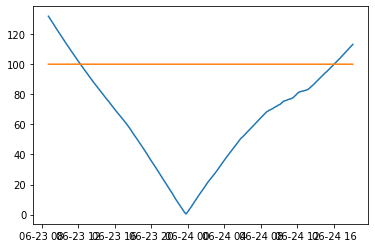

In [23]:
# FIRST FLY BY: 
k= 23000
k_s= 21000
plt.plot(time_short[k_s:k],dist[k_s:k])
plt.plot(time_short[k_s:k],p[k_s:k])


In [24]:
wind_fly_by=SD_wind_short[k_s:k-4]
time_fly_by= time_short[k_s:k-4]

d = np.where(np.array(OOI.time) == np.datetime64(datetime.datetime(2019, 6, 23, 8, 45, 0)))
start = np.int(d[0])
e = np.where(np.array(OOI.time) == np.datetime64(datetime.datetime(2019, 6, 24, 18, 30, 0)))
stop = np.int(e[0])

OOI_time_d = OOI.time[start+1: stop+1]

OOI_wind_d = OOI.met_relwind_speed[start+1: stop+1]

u= np.diff(OOI_time_d)
a= np.array(u, dtype=float)
w= np.where(a==0)

f= np.append(a, 2)

#np.delete (OOI_ctdtemp, w)
OOI_time= OOI_time_d[f!=0]
OOI_wind= OOI_wind_d[f!=0]


l = np.arange(0, 1996, 15)
SD_wind_fly_by = []

for i in l:
    SD_wind_fly_by.append(np.nanmean(SD_wind_10m_u100[i:i+14]))
len(SD_wind_fly_by)

len(OOI_wind_d)

142

In [26]:
# find indx start time, stop time, where SD is in 100km radius 
b = np.where(np.array(OOI.time) == np.datetime64(datetime.datetime(2019, 6, 23, 12, 0, 0)))
start = np.int(b[0])+2
c = np.where(np.array(OOI.time) == np.datetime64(datetime.datetime(2019, 6, 28, 10, 30, 0)))
stop = np.int(c[0])

# cut OOI data accordingly
OOI_time_d = OOI.time[start+1: stop+1] # 19.6.2019 12:15 - 30.6.2019 22:45

OOI_airtemp_d = OOI.air_temperature[start+1: stop+1]
OOI_ctdtemp_d = OOI.sea_surface_temperature[start+1: stop+1]
OOI_wind_d = OOI.met_relwind_speed[start+1: stop+1]
OOI_pres_d = OOI.barometric_pressure[start+1: stop+1]

u= np.diff(OOI_time_d)
a= np.array(u, dtype=float)
w= np.where(a==0)

f= np.append(a, 2)
#np.delete (OOI_ctdtemp, w)
OOI_time= OOI_time_d[f!=0]
OOI_ctdtemp= OOI_ctdtemp_d[f!=0]
OOI_wind= OOI_wind_d[f!=0]
OOI_pres= OOI_pres_d[f!=0]
OOI_airtemp = OOI_airtemp_d[f!=0]


In [17]:
#plt.plot(distance_15min[:100])
indx_u100km= np.where(distance_15min < 100)
#plt.plot(np.array(OOI_time[indx_u100km]), distance_15min[indx_u100km])
#OOI_wind[indx_u100km]

Text(0, 0.5, 'SD wind speed [m/s]')

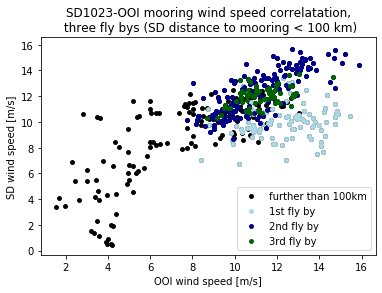

In [18]:
#len(OOI_wind)
a= 100
b= 200
c= 350
d= 405 
e= 500
#len(SD_wind_u100_15min)
#plt.plot(distance_15min[:110])
plt.scatter(OOI_wind,SD_wind_u100_15min,c='k', s=15, label='further than 100km')
plt.scatter(OOI_wind[:a], SD_wind_u100_15min[:a], label='1st fly by', c='lightblue',s=15)

plt.scatter(OOI_wind[b:c], SD_wind_u100_15min[b:c], label='2nd fly by', c= 'darkblue', s=15)
plt.scatter(OOI_wind[d:e],SD_wind_u100_15min[d:e], s=15, c= 'darkgreen', label='3rd fly by')
# second flyby looks best , why ? 
plt.legend()
plt.title('SD1023-OOI mooring wind speed correlatation,\n three fly bys (SD distance to mooring < 100 km)')
plt.xlabel('OOI wind speed [m/s]')
plt.ylabel('SD wind speed [m/s]')
#plt.savefig("SD1023_windspeed_flybys.pdf", bbox_inches='tight',transparent=True)

## Is correlation biased by rel. wind direction ? 

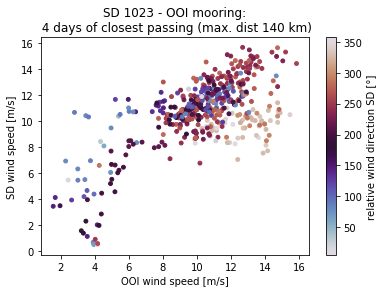

In [91]:
rel_wind_dir_15min = np.mod(np.array(SD_wind_dir_u100_15min) - np.array(SD_heading_u100_15min), 360)
plt.scatter(OOI_wind,SD_wind_u100_15min, c= rel_wind_dir_15min, cmap = 'twilight', s=15, label='further than 100km')

plt.colorbar(label='relative wind direction SD [°]')
plt.xlabel('OOI wind speed [m/s]')
plt.ylabel('SD wind speed [m/s]')
plt.title('SD 1023 - OOI mooring:\n 4 days of closest passing (max. dist 140 km)')
plt.savefig("SD1023_windspeed_correlation_rel_wind_dir_all.pdf", bbox_inches='tight',transparent=True)

Text(0.5, 1.0, '3rd fly by (dist. <100 km)')

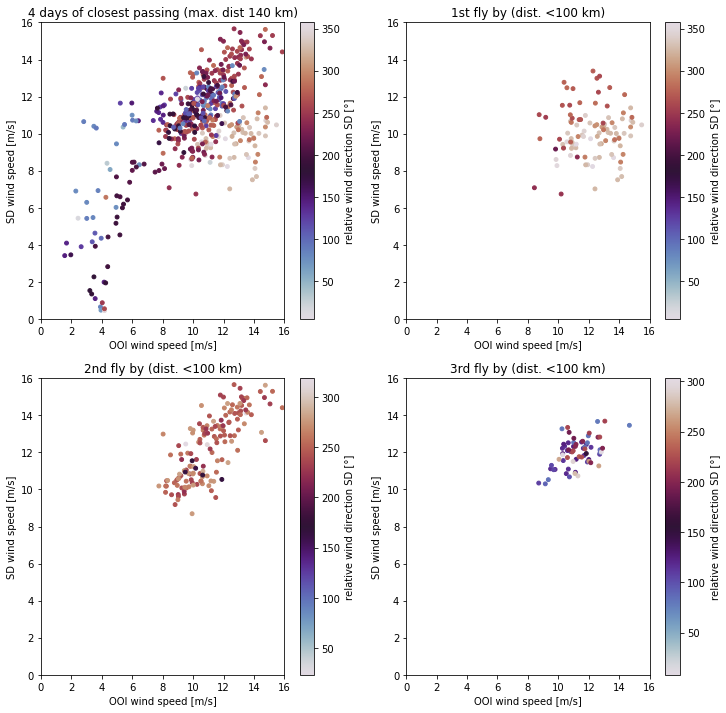

In [92]:
indx_u100km= np.where(distance_15min < 100)
a= 100
b= 200
c= 350
d= 405 
e= 500
x = OOI_wind 
y = SD_wind_u100_15min

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,sharex=False,figsize=[12,12])#[15,8]

h1= ax1.scatter(x, y, c= rel_wind_dir_15min, cmap = 'twilight', s=15, label='further than 100km')
fig.colorbar(h1, label='relative wind direction SD [°]', ax= ax1)
ax1.set_xlabel('OOI wind speed [m/s]')
ax1.set_ylabel('SD wind speed [m/s]')
ax1.set_xlim(0,16)
ax1.set_ylim(0,16)
ax1.set_title('4 days of closest passing (max. dist 140 km)')

h2= ax2.scatter(x[:a], y[:a], c= rel_wind_dir_15min[:a], cmap = 'twilight', s=15, label='further than 100km')
fig.colorbar(h2, label='relative wind direction SD [°]', ax= ax2)
ax2.set_xlabel('OOI wind speed [m/s]')
ax2.set_ylabel('SD wind speed [m/s]')
ax2.set_xlim(0,16)
ax2.set_ylim(0,16)
ax2.set_title('1st fly by (dist. <100 km)')

h3= ax3.scatter(x[b:c], y[b:c], c= rel_wind_dir_15min[b:c], cmap = 'twilight', s=15, label='further than 100km')
fig.colorbar(h3, label='relative wind direction SD [°]', ax= ax3)
ax3.set_xlabel('OOI wind speed [m/s]')
ax3.set_ylabel('SD wind speed [m/s]')
ax3.set_xlim(0,16)
ax3.set_ylim(0,16)
ax3.set_title('2nd fly by (dist. <100 km)')

h4= ax4.scatter(x[d:e], y[d:e], c= rel_wind_dir_15min[d:e], cmap = 'twilight', s=15, label='further than 100km')
fig.colorbar(h4, label='relative wind direction SD [°]', ax= ax4)
ax4.set_xlabel('OOI wind speed [m/s]')
ax4.set_ylabel('SD wind speed [m/s]')
ax4.set_xlim(0,16)
ax4.set_ylim(0,16)
ax4.set_title('3rd fly by (dist. <100 km)')
#plt.savefig("SD1023_windspeed_correlation_rel_wind_dir_subplots.pdf", bbox_inches='tight',transparent=True)

array([99.87038605, 98.95527069, 98.55577415, 97.51965439, 96.42725386,
       95.2075292 , 93.98724619, 92.68863192, 91.46193796, 90.07322767,
       88.74071355, 87.42912425, 86.05384392, 84.66415924, 83.08173766,
       81.59346783, 80.01081003, 78.51031785, 76.95946386, 75.43416425,
       73.9823928 , 72.60803184, 71.1992814 , 69.93480745, 68.7399934 ,
       67.50301442, 66.22443952])

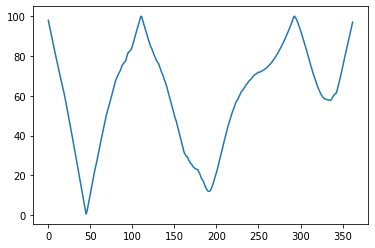

In [19]:
ix= np.where(distance_15min < 100)

#f= indx_u100km[0]
k=ix[0]
#SD_wind_u100_15min[k]
#OOI_wind[k]
#np.array(SD_wind_u100_15min)[k]
fx= distance_15min[indx_u100km]
plt.plot(fx[:])
fx[293:320]

Text(0.5, 1.0, '3rd fly by (dist. <100 km)')

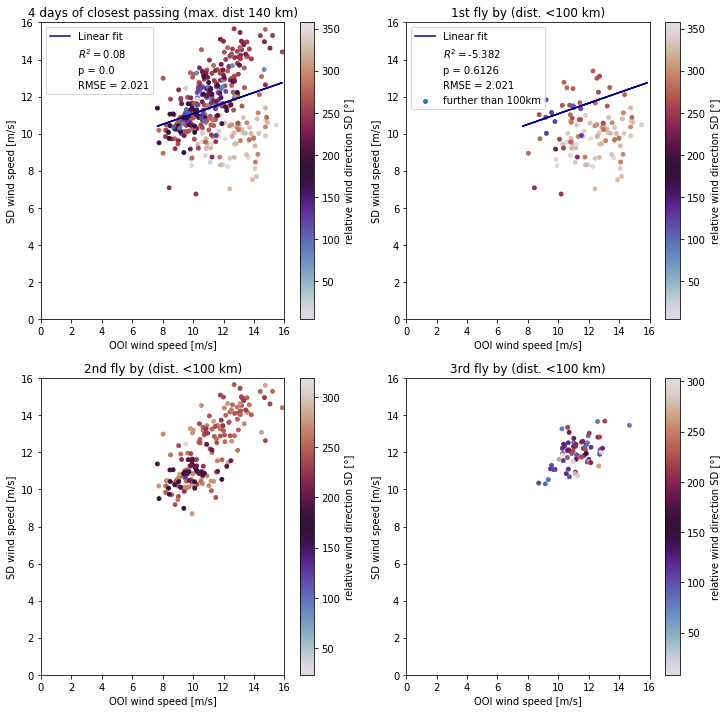

In [159]:
from scipy.stats import ttest_ind
def linefitline(b):
    return intercept + slope * b
indx_u100km= np.where(distance_15min < 100)
a= 110
b= 293
c= 293
d= 293
#e= 500
x = OOI_wind[indx_u100km]
y = np.array(SD_wind_u100_15min)[indx_u100km]
co= rel_wind_dir_15min[indx_u100km]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,sharex=False,figsize=[12,12])#[15,8]

h1= ax1.scatter(x, y, c= co, cmap = 'twilight', s=15)
fig.colorbar(h1, label='relative wind direction SD [°]', ax= ax1)
ax1.set_xlabel('OOI wind speed [m/s]')
ax1.set_ylabel('SD wind speed [m/s]')
ax1.set_xlim(0,16)
ax1.set_ylim(0,16)
ax1.set_title('4 days of closest passing (max. dist 140 km)')
#define function
#creating OLS regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line1 = linefitline(x)
#calculate p-value (probability the null hypothesis is true): 
t, p = ttest_ind(x,y)
r2 = r2_score(y, line1)
ax1.plot(x,line1, c = 'darkblue',label='Linear fit')
ax1.plot([], [], ' ', label= '$R^2=$'+ str(np.round(r2,decimals=3)))
ax1.plot([], [], ' ', label= 'p = '+ str(np.round(p_value,decimals=4)))
ax1.plot([], [], ' ', label= 'RMSE = '+ str(np.round(SD.rmse(np.array(x),np.array(y)),decimals=4)))
ax1.legend(loc='best')


h2= ax2.scatter(x[:a], y[:a], c= co[:a], cmap = 'twilight', s=15, label='further than 100km')
fig.colorbar(h2, label='relative wind direction SD [°]', ax= ax2)
ax2.set_xlabel('OOI wind speed [m/s]')
ax2.set_ylabel('SD wind speed [m/s]')
ax2.set_xlim(0,16)
ax2.set_ylim(0,16)
ax2.set_title('1st fly by (dist. <100 km)')
lope, intercept, r_value, p_value, std_err = stats.linregress(x[:a],y[:a])
line2 = linefitline(x[:a])
#calculate p-value (probability the null hypothesis is true): 
t, p = ttest_ind(x[:a], y[:a])
r2 = r2_score(y[:a], line2)
ax2.plot(x,line1, c = 'darkblue',label='Linear fit')
ax2.plot([], [], ' ', label= '$R^2=$'+ str(np.round(r2,decimals=3)))
ax2.plot([], [], ' ', label= 'p = '+ str(np.round(p_value,decimals=4)))
ax2.plot([], [], ' ', label= 'RMSE = '+ str(np.round(SD.rmse(np.array(x),np.array(y)),decimals=4)))
ax2.legend(loc='best')


h3= ax3.scatter(x[a:b], y[a:b], c= co[a:b], cmap = 'twilight', s=15)
fig.colorbar(h3, label='relative wind direction SD [°]', ax= ax3)
ax3.set_xlabel('OOI wind speed [m/s]')
ax3.set_ylabel('SD wind speed [m/s]')
ax3.set_xlim(0,16)
ax3.set_ylim(0,16)
ax3.set_title('2nd fly by (dist. <100 km)')

h4= ax4.scatter(x[b:], y[b:], c= co[b:], cmap = 'twilight', s=15)
fig.colorbar(h4, label='relative wind direction SD [°]', ax= ax4)
ax4.set_xlabel('OOI wind speed [m/s]')
ax4.set_ylabel('SD wind speed [m/s]')
ax4.set_xlim(0, 16)
ax4.set_ylim(0, 16)
ax4.set_title('3rd fly by (dist. <100 km)')
#plt.savefig("SD1023_windspeed_correlation_rel_wind_dir_subplots_allbelow100km.pdf", bbox_inches='tight',transparent=True)

In [16]:
# CUT OUT NANs in CTD temp, and compare non nans with OOI

#y= y1[~np.isnan(y1)]
#SD_pres_u100_15min_no_nan = SD_pres_u100_15min[~np.isnan(SD_pres_u100_15min)]
f = np.array(SD_ctdtemp_u100_15min)
g = OOI_ctdtemp
SD_ctdtemp_u100_15min_no_nan = f[~np.isnan(f)]
OOI_ctdtemp_no_nan = g[~np.isnan(f)]
OOI_time_no_nan = OOI_time [~np.isnan(f)]
plt.plot(OOI_time_no_nan, OOI_ctdtemp_no_nan )
plt.plot(OOI_time_no_nan, SD_ctdtemp_u100_15min_no_nan)

NameError: name 'OOI_ctdtemp' is not defined

Text(0, 0.5, 'SD 1023 distance, mooring [km]')

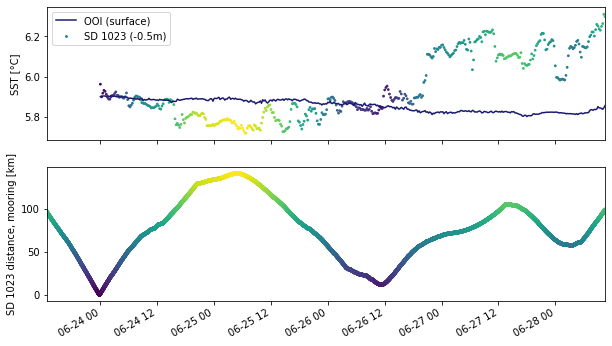

In [10]:
#OOI 1st DATA SET import matplotlib
import matplotlib.cm as cm
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.metrics import r2_score
from scipy.stats import ttest_ind    
    
f = np.array(SD_ctdtemp_u100_15min)

a_time=OOI_time_no_nan
ds_time= SD_time_u100
z=distance_15min
z_no= distance_15min[~np.isnan(f)]
#OOI_ctdtemp_no_nan = g[~np.isnan(f)]

fig, (ax2,ax3) =  plt.subplots(2,1,sharex=True,figsize=[10,6])#[15,8]

fig.autofmt_xdate()
#ax1.plot(a_time,OOI_ctdtemp, label='OOI (surface)')
#ax1.plot(ds_time,SD_ctdtemp, label='SD 1022 (-0.5m)')
#ax1.set_ylabel('CTD temperature [°C]')
#ax1.legend()

#ax2.scatter(np.array(a_time),OOI_ctdtemp,c=z,s=3, label='OOI (surface)')
ax2.scatter(np.array(OOI_time_no_nan), SD_ctdtemp_u100_15min_no_nan, c=z_no,s=3, label='SD 1023 (-0.5m)')
ax2.plot(np.array(a_time), OOI_ctdtemp_no_nan, label='OOI (surface)', color='midnightblue')
ax2.legend(loc='best')
ax2.set_ylabel( 'SST [°C]')
ax2.set_xlim(datetime.datetime(2019, 6, 23, 12, 45, 0), datetime.datetime(2019, 6, 28, 10, 30,0))

im = ax3.scatter(np.array(time_short[v_min:v_max]),dist[v_min:v_max], c= dist[v_min:v_max], s=10)
ax3.set_ylabel('SD 1023 distance, mooring [km]')
#fig.colorbar(im, label= 'distance morring SD [km]')
#fig.savefig("SD1023_mooring_CTD_temp_distance.pdf", bbox_inches='tight',transparent=True)

In [14]:
maxdist= 15
close=np.where(distance_15min<maxdist)
#len(close[0])
b= np.where(distance_15min[45:]<maxdist)

In [19]:
#np.savetxt('OOI_irtemp.txt', OOI_airtemp)
#np.savetxt('SD1023_T_air.txt', SD_airtemp_u100_15min)
#np.savetxt('SD1023_T_air_err.txt', SD_airtemp_u100_15min_std)

#np.savetxt('OOI_5mwind.txt', OOI_wind)
#np.savetxt('SD1023_wind_10m.txt', SD_wind_u100_15min)
#np.savetxt('SD1023_wind_10m_err.txt', SD_wind_u100_15min_std)

#np.savetxt('OOI_sst_cutstart45.txt', np.array(OOI_ctdtemp)[45:])
#np.savetxt('SD1023_sst_cutstart45.txt', np.array(SD_ctdtemp_u100_15min)[45:])
#np.savetxt('SD1023_sst_cutstart_err45.txt', np.array(SD_ctdtemp_u100_15min_std)[45:])



#np.savetxt('SD1023_OOI_distance_15min.txt', distance_15min)

# combine all 4 variables in one plot - OOI comparison


IndexError: index 2103 is out of bounds for axis 0 with size 427

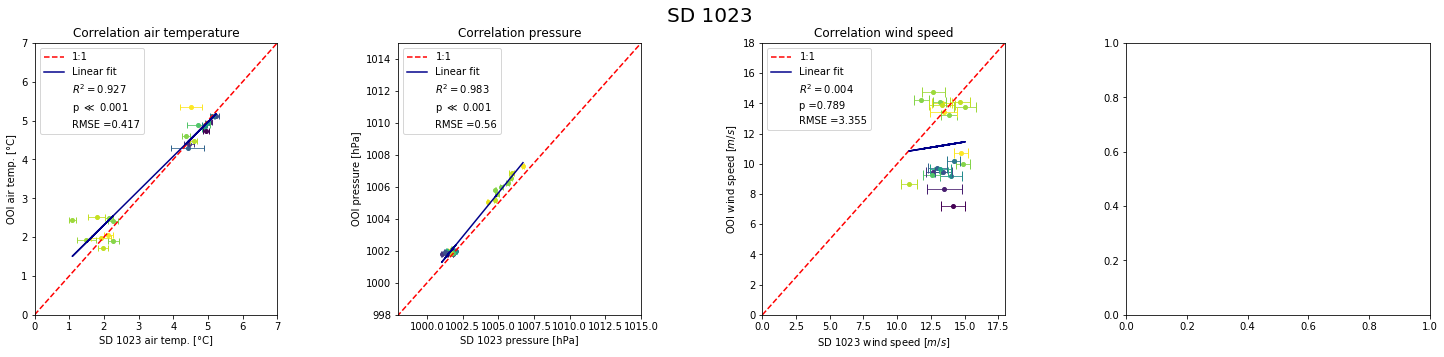

In [27]:
fig= plt.figure(figsize =[25,5])#, sharex = True)
fig.suptitle("SD 1023", fontsize=20)
#fig.subtitle('SD1023')
x1 = OOI_airtemp[close]
y1 = np.array(SD_airtemp_u100_15min)[close]
xerr1=  np.array(SD_airtemp_u100_15min_std)[close]        
ax1=plt.subplot(141)
clb=SD.plot_scatter_errorbars_color_correlation(x1, y1, distance_15min[close], xerr1, yerro=None,
                                            xlabel='SD 1023 air temp. [°C]',
                                            ylabel='OOI air temp. [°C]', 
                                           cbarlabel='distance mooring, SD [km]', 
                                       title='Correlation air temperature', capsize1=3, m=4, l=.8)
#ax1.xlim(0,7) 
clb[0].remove()
plt.xlim(0,7)
plt.ylim(0,7)
#ax1.set_ylim(0,7)
ax2= plt.subplot(142)
x2 = OOI_pres[close]
y2 = np.array(SD_pres_u100_15min)[close]
  
xerr2=  np.array(SD_pres_u100_15min_std)[close]    
clb2= SD.plot_scatter_errorbars_color_correlation(x2, y2, distance_15min[close], xerr2, yerro=None,
                                            xlabel='SD 1023 pressure [hPa]',
                                            ylabel='OOI pressure [hPa]', 
                                            cbarlabel='distance mooring, SD [km]', 
                                            title='Correlation pressure', capsize1=3, m=4, l=.8)
plt.xlim(998,1015)
plt.ylim(998,1015)
clb2[0].remove()
ax3= plt.subplot(143)
x3 = OOI_wind[close]
y3 = np.array(SD_wind_u100_15min)[close]

xerr3=  np.array(SD_wind_u100_15min_std)[close]

clb3= SD.plot_scatter_errorbars_color_correlation(x3, y3, distance_15min[close], xerr3, yerro=None,
                                            xlabel='SD 1023 wind speed [$m/s$]',
                                            ylabel='OOI wind speed [$m/s$]', 
                                            cbarlabel='distance mooring, SD [km]', 
                                            title='Correlation wind speed', capsize1=5, m=4, l=.8)
plt.xlim(0,18)
plt.ylim(0,18)
clb3[0].remove()

ax4 = plt.subplot(144)
# first 45 entries are nans for ctd measurements (not sure why: battery?)
f= np.array(SD_ctdtemp_u100_15min)[45:]
g= np.array(OOI_ctdtemp)[45:]
a= close
#b= np.array(a[0][45:])
x4= f[b]
y4= g[b]
#plt.scatter(g[45:],f[45:],c= distance_15min[45:])
#f = np.array(SD_ctdtemp_u100_15min)#[close]
z_no = np.array(distance_15min)[45:]#[close]
z = z_no  [b]
err4 = np.array(SD_ctdtemp_u100_15min_std)[45:]
xerr4 = err4[b]#np.array(SD_wind_u100_15min_std)[~np.isnan(f)]       
clb4 = SD.plot_scatter_errorbars_color_correlation(x4, y4, z, xerro=xerr4, yerro=None,
                                            xlabel='SD 1023 CTD temp [$m/s$]',
                                            ylabel='OOI SST [$m/s$]', 
                                            cbarlabel='distance mooring, SD [km]', 
                                            title='Correlation Water temperature SD 1023', capsize1=5, m=4, l=.8)
plt.xlim(5.8, 6.0)
plt.ylim(5.8, 6.0)
clb4[0].remove()
cax= fig.add_axes([0.91, 0.125, 0.01, 0.755])
plt.colorbar(cax=cax, label='distance mooring SD [km]', ax=[clb[1], clb2[1], clb3[1], clb4[1]])
plt.subplots_adjust(wspace = 0.3)
#plt.savefig("SD1023_OOI_correlations_35km.png", bbox_inches='tight',transparent=True)

In [1]:
maxdist= 15
close=np.where(distance_15min<maxdist)
#len(close[0])
b= np.where(distance_15min[45:]<maxdist)

NameError: name 'np' is not defined

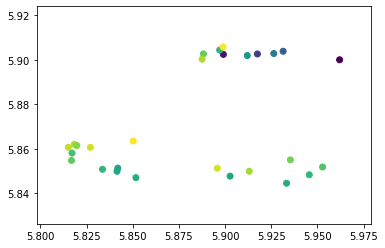

In [136]:
f= np.array(SD_ctdtemp_u100_15min)[45:]
g= np.array(OOI_ctdtemp)[45:]
a= close
#b= np.array(a[0][45:])
x4= f[b]
y4= g[b]
z_no = np.array(distance_15min)[45:]#[close]
z = z_no[b]
plt.scatter(x4,y4, c= z)

In [114]:
a= close # first 45 entries are nans for ctd measurements (not sure why: battery?)
f= np.array(SD_ctdtemp_u100_15min)[45:]
g= np.array(OOI_ctdtemp)[45:]
#x4= f[a[0]]
b= np.array(a[0][45:])


(array([ 24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
         37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
         50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
         63,  64,  65,  66,  67,  68, 243, 244, 245, 246, 247, 248, 249,
        250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262,
        263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275,
        276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288,
        289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301,
        302, 303, 304, 305, 306, 307, 308, 309], dtype=int64),)

(0, 7)

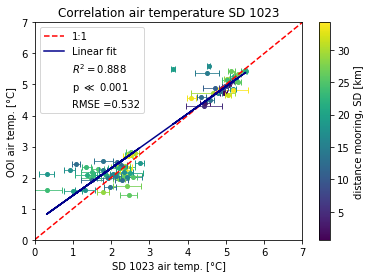

In [36]:
#plt.scatter(OOI_ctdtemp,np.array(SD_ctdtemp_u100_15min[:-1], dtype= float))
#plt.scatter(OOI_pres,np.array(SD_pres_u100_15min[:-1], dtype= float))
#plt.scatter(, , dtype= float), s=2)
#distance_15min= dist[::15]
import SD_Project as SD
x1 = OOI_airtemp[close]
y1 = np.array(SD_airtemp_u100_15min)[close]
  
xerr=  np.array(SD_airtemp_u100_15min_std)[close]        
SD.plot_scatter_errorbars_color_correlation(x1, y1, distance_15min[close], xerr, yerro=None,
                                            xlabel='SD 1023 air temp. [°C]',
                                            ylabel='OOI air temp. [°C]', 
                                            cbarlabel='distance mooring, SD [km]', 
                                            title='Correlation air temperature SD 1023', capsize1=3, m=4, l=.8)
plt.xlim(0,7)
plt.ylim(0,7)
#plt.savefig("SD1023_OOI_correlation_air_temp.pdf", bbox_inches='tight',transparent=True)

(988, 1020)

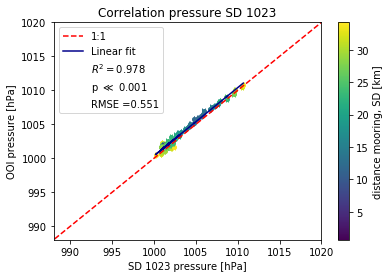

In [37]:
import SD_Project as SD
x1 = OOI_pres[close]
y1 = np.array(SD_pres_u100_15min)[close]
  
xerr=  np.array(SD_pres_u100_15min_std)[close]    
SD.plot_scatter_errorbars_color_correlation(x1, y1, distance_15min[close], xerr, yerro=None,
                                            xlabel='SD 1023 pressure [hPa]',
                                            ylabel='OOI pressure [hPa]', 
                                            cbarlabel='distance mooring, SD [km]', 
                                            title='Correlation pressure SD 1023', capsize1=3, m=4, l=.8)
plt.xlim(988,1020)
plt.ylim(988,1020)
#plt.savefig("SD1023_OOI_correlation_pressure.pdf", bbox_inches='tight',transparent=True)

154

(0, 18)

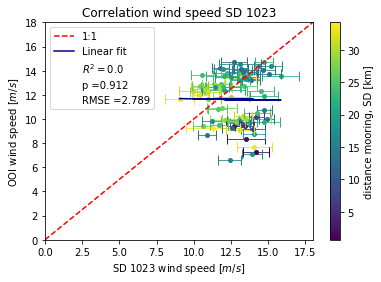

In [14]:
import SD_Project as SD
x1 = OOI_wind[close]
y1 = np.array(SD_wind_u100_15min)[close]

xerr=  np.array(SD_wind_u100_15min_std)[close]

SD.plot_scatter_errorbars_color_correlation(x1, y1, distance_15min[close], xerr, yerro=None,
                                            xlabel='SD 1023 wind speed [$m/s$]',
                                            ylabel='OOI wind speed [$m/s$]', 
                                            cbarlabel='distance mooring, SD [km]', 
                                            title='Correlation wind speed SD 1023', capsize1=5, m=4, l=.8)
plt.xlim(0,18)
plt.ylim(0,18)
#plt.savefig("SD1023_OOI_correlation_wind.pdf", bbox_inches='tight',transparent=True)

(5.6, 6.5)

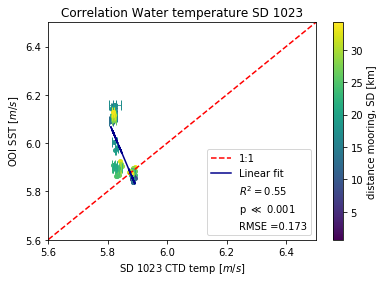

In [41]:
import SD_Project as SD
x1 = OOI_ctdtemp_no_nan[close]
y1 = np.array(SD_ctdtemp_u100_15min_no_nan)[close]
#import SD_Project as SD
#x1 = OOI_wind
#y1 = np.array(SD_wind_u100_15min)
f = np.array(SD_ctdtemp_u100_15min)[close]
z_no= distance_15min[close]
  
xerr= SD_ctdtemp_u100_15min_std #np.array(SD_wind_u100_15min_std)[~np.isnan(f)]       
SD.plot_scatter_errorbars_color_correlation(x1, y1, z_no, xerro=xerr, yerro=None,
                                            xlabel='SD 1023 CTD temp [$m/s$]',
                                            ylabel='OOI SST [$m/s$]', 
                                            cbarlabel='distance mooring, SD [km]', 
                                            title='Correlation Water temperature SD 1023', capsize1=5, m=4, l=.8)
plt.xlim(5.6, 6.5)
plt.ylim(5.6, 6.5)
#plt.savefig("SD1023_OOI_correlation_ctd_temp.pdf", bbox_inches='tight',transparent=True)

In [52]:
f = np.array(SD_ctdtemp_u100_15min)
g = OOI_ctdtemp
SD_ctdtemp_u100_15min_no_nan = f[~np.isnan(f)]
OOI_ctdtemp_no_nan = g[~np.isnan(f)]
OOI_time_no_nan = OOI_time [~np.isnan(f)]

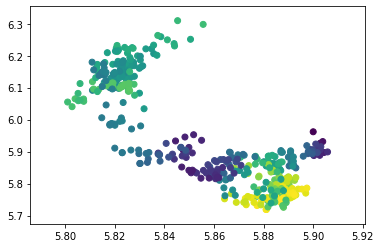

In [63]:
f = np.array(SD_ctdtemp_u100_15min)
g = OOI_ctdtemp
plt.scatter(g[45:],f[45:],c= distance_15min[45:])

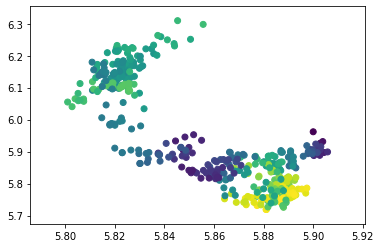

In [42]:
x1 = np.array(OOI_ctdtemp_no_nan)
y1 = np.array(SD_ctdtemp_u100_15min_no_nan)
#import SD_Project as SD
#x1 = OOI_wind
#y1 = np.array(SD_wind_u100_15min)
f = np.array(SD_ctdtemp_u100_15min)
z_no= distance_15min[~np.isnan(f)]
plt.scatter(x1,y1,c=z_no)

<ErrorbarContainer object of 3 artists>

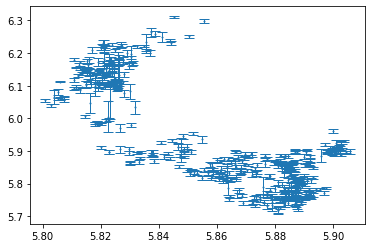

In [79]:
x1 = OOI_ctdtemp
y1 = np.array(SD_ctdtemp_u100_15min)
xerr= SD_ctdtemp_u100_15min_std
f = np.array(SD_ctdtemp_u100_15min)
xerr=  SD_wind_u100_15min_std  
z_no= distance_15min[~np.isnan(f)]
#fig, ax1 =  plt.subplots(1, 1, figsize=[6,6])
plt.errorbar(x1 ,y1 ,fmt='o',yerr=SD_ctdtemp_u100_15min_std,linewidth=1,capsize=5,label='SD 1022', ms=1)

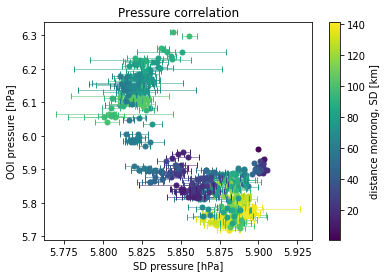

In [163]:
def bla(x1, y1, z, xerro, yerro, xlabel, ylabel, cbarlabel, title, capsize1, m, l):
    """
    plot_scatter_errorbars_color_correlation(x1, y1, z, xerro, yerro, xlabel, ylabel, cbarlabel, title)
    
    x1, y1 , z :array like and need to have the same size
    
    xerro, yerro: errorbars if applicable 
    cbarlabel: colorbar label 
    title: figure title 
    capsize1, size of markers in px
    m : markersize
    l: linewidth
    
    """
    import matplotlib
    import matplotlib.cm as cm
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy import stats
    from sklearn.metrics import r2_score
    from scipy.stats import ttest_ind
    #import scipy
    
    #make colormap for scatter plot
    sc = plt.scatter(x1, y1, s=0, c=z)
    #create colorbar according to the scatter plot
    clb = plt.colorbar(sc, label=cbarlabel)
    
    norm = matplotlib.colors.Normalize(vmin=min(z), vmax=max(z), clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap='viridis')
    time_color = np.array([(mapper.to_rgba(v)) for v in z])

    #loop over each data point to plot
    for x, y, e, color in zip(x1, y1, xerro, time_color):
        plt.plot(x, y, 'o', color=color, ms=m, lw=l)
        plt.errorbar(x, y,  xerr=e, yerr=yerro, ms=m, capsize=capsize1, color=color, lw=l)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    #plt.legend(loc='best')

x1 = np.array(OOI_ctdtemp_no_nan)
y1 = np.array(SD_ctdtemp_u100_15min_no_nan)

f = np.array(SD_ctdtemp_u100_15min)
xerr=  SD_ctdtemp_u100_15min_std  
z_no= distance_15min[~np.isnan(f)]

bla(np.array(x1), np.array(y1), z_no,
    xerr, yerro=None, xlabel='SD pressure [hPa]',
    ylabel='OOI pressure [hPa]',
    cbarlabel='distance morrong, SD [km]', 
    title='Pressure correlation',capsize1=3, m=5, l=.8)

In [103]:
f = np.array(SD_ctdtemp_u100_15min)
#z_no= distance_15min[~np.isnan(f)]
z_no= np.array(distance_15min[~np.isnan(f)])

IndexError: boolean index did not match indexed array along dimension 0; dimension is 2667 but corresponding boolean dimension is 472

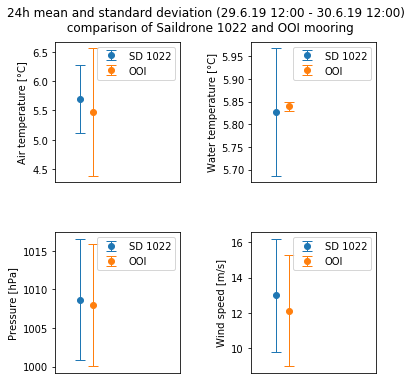

In [7]:
#OOI.time[2689:2785] 29.6 12:00 , stop:30.06. 11:45 (24h) 
#72720:74160
#np.where(np.array(DS.time) == np.datetime64(datetime.datetime(2019, 6,30,12,0,0)))
#DS.time[74160]
SD_airtemp= DS.TEMP_AIR_MEAN[72720:74160]
SD_ctdtemp= DS.TEMP_CTD_RBR_MEAN[72720:74160]
SD_wind=SD.wind(DS.UWND_MEAN,DS.VWND_MEAN)
SD_wind=SD_wind[72720:74160]
SD_pres=DS.BARO_PRES_MEAN[72720:74160]

OOI_met_time=OOI_met.time[41042:42482] # start 29.6.19. 12:00 - 30.6. 11:59
OOI_met_airtemp=OOI_met.air_temperature[41042:42482]
OOI_met_ctdtemp=OOI_met.sea_surface_temperature[41042:42482]
OOI_met_wind= OOI_met.met_relwind_speed[41042:42482]
OOI_met_pres=OOI_met.barometric_pressure[41042:42482]


#np.nanmean(SD_airtemp)
k=[1]
l=[1.5]
#plt.plot(k,np.nanmean(SD_airtemp),'.')
#plt.figure()
fig, ((ax1, ax2), (ax3, ax4)) =  plt.subplots(2,2,sharex=True,figsize=[6,6])#[15,8]
fig.tight_layout(pad=4)#, h_pad=2)
fig.suptitle('24h mean and standard deviation (29.6.19 12:00 - 30.6.19 12:00) \n comparison of Saildrone 1022 and OOI mooring')
ax1.errorbar(k,np.nanmean(SD_airtemp),fmt='o',yerr=np.nanstd(SD_airtemp),linewidth=1,capsize=5,label='SD 1022')
ax1.errorbar(l,np.nanmean(OOI_met_airtemp),fmt='o',  yerr=np.nanstd(OOI_met_airtemp),linewidth=1,capsize=5,label='OOI')#OOI_airtemp
ax1.set_xlim(0,5)#plt.plot(np.nanstd(OOI_airtemp),'.')
ax1.set_ylabel('Air temperature [°C]')
ax1.legend()
#ax1.title('24h mean and standard deviation (29.6.19 12:00 - 30.6.19 12:00)')
#plt.savefig("SD1022_mooring_airtemp_mean.pdf", bbox_inches='tight',transparent=True)
ax1.tick_params(bottom=False,top=False,labelbottom=False)    

ax2.errorbar(k,np.nanmean(SD_ctdtemp),fmt='o',yerr=np.nanstd(SD_ctdtemp),linewidth=1,capsize=5,label='SD 1022')
ax2.errorbar(l,np.nanmean(OOI_met_ctdtemp),fmt='o',  yerr=np.nanstd(OOI_met_ctdtemp),linewidth=1,capsize=5,label='OOI')#OOI_airtemp
ax2.set_xlim(0,5)#plt.plot(np.nanstd(OOI_airtemp),'.')
#plt.ylim(5.6,6)
ax2.set_ylabel('Water temperature [°C]')
ax2.legend()
ax2.tick_params(bottom=False,top=False,labelbottom=False)    

ax3.errorbar(k,np.nanmean(SD_pres),fmt='o',yerr=np.nanstd(SD_pres),linewidth=1,capsize=5,label='SD 1022')
ax3.errorbar(l,np.nanmean(OOI_met_pres),fmt='o',  yerr=np.nanstd(OOI_met_pres),linewidth=1,capsize=5,label='OOI')#OOI_airtemp
ax3.set_xlim(0,5)
ax3.set_ylabel('Pressure [hPa]') # units diffrent in raw data, why ? 
ax3.legend()
ax3.tick_params(bottom=False,top=False,labelbottom=False)    

ax4.errorbar(k,np.nanmean(SD_wind),fmt='o',yerr=np.nanstd(SD_wind),linewidth=1,capsize=5,label='SD 1022')
ax4.errorbar(l,np.nanmean(OOI_met_wind),fmt='o',  yerr=np.nanstd(OOI_met_wind),linewidth=1,capsize=5,label='OOI')#OOI_airtemp
ax4.set_xlim(0,5)
ax4.set_ylabel('Wind speed [m/s]')
ax4.legend()
ax4.tick_params(bottom=False,top=False,labelbottom=False)  

#######################################
#standard deviation does not represent the error
#STD/sqrt(n), with n= 24 as in 24 indipendent samples from mooring 


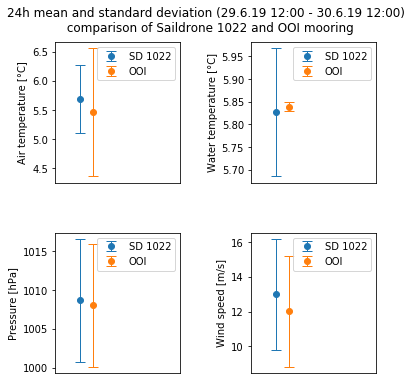

In [4]:



#np.nanmean(SD_airtemp)
k=[1]
l=[1.5]
#plt.plot(k,np.nanmean(SD_airtemp),'.')
#plt.figure()
fig, ((ax1, ax2), (ax3, ax4)) =  plt.subplots(2,2,sharex=True,figsize=[6,6])#[15,8]
fig.tight_layout(pad=4)#, h_pad=2)
fig.suptitle('24h mean and standard deviation (29.6.19 12:00 - 30.6.19 12:00) \n comparison of Saildrone 1022 and OOI mooring')
ax1.errorbar(k,np.nanmean(SD_airtemp),fmt='o',yerr=np.nanstd(SD_airtemp),linewidth=1,capsize=5,label='SD 1022')
ax1.errorbar(l,np.nanmean(OOI_airtemp),fmt='o',  yerr=np.nanstd(OOI_airtemp),linewidth=1,capsize=5,label='OOI')#OOI_airtemp
ax1.set_xlim(0,5)#plt.plot(np.nanstd(OOI_airtemp),'.')
ax1.set_ylabel('Air temperature [°C]')
ax1.legend()
#ax1.title('24h mean and standard deviation (29.6.19 12:00 - 30.6.19 12:00)')
#plt.savefig("SD1022_mooring_airtemp_mean.pdf", bbox_inches='tight',transparent=True)
ax1.tick_params(bottom=False,top=False,labelbottom=False)    

ax2.errorbar(k,np.nanmean(SD_ctdtemp),fmt='o',yerr=np.nanstd(SD_ctdtemp),linewidth=1,capsize=5,label='SD 1022')
ax2.errorbar(l,np.nanmean(OOI_ctdtemp),fmt='o',  yerr=np.nanstd(OOI_ctdtemp),linewidth=1,capsize=5,label='OOI')#OOI_airtemp
ax2.set_xlim(0,5)#plt.plot(np.nanstd(OOI_airtemp),'.')
#plt.ylim(5.6,6)
ax2.set_ylabel('Water temperature [°C]')
ax2.legend()
ax2.tick_params(bottom=False,top=False,labelbottom=False)    

ax3.errorbar(k,np.nanmean(SD_pres),fmt='o',yerr=np.nanstd(SD_pres),linewidth=1,capsize=5,label='SD 1022')
ax3.errorbar(l,np.nanmean(OOI_pres),fmt='o',  yerr=np.nanstd(OOI_pres),linewidth=1,capsize=5,label='OOI')#OOI_airtemp
ax3.set_xlim(0,5)
ax3.set_ylabel('Pressure [hPa]') # units diffrent in raw data, why ? 
ax3.legend()
ax3.tick_params(bottom=False,top=False,labelbottom=False)    

ax4.errorbar(k,np.nanmean(SD_wind),fmt='o',yerr=np.nanstd(SD_wind),linewidth=1,capsize=5,label='SD 1022')
ax4.errorbar(l,np.nanmean(OOI_wind),fmt='o',  yerr=np.nanstd(OOI_wind),linewidth=1,capsize=5,label='OOI')#OOI_airtemp
ax4.set_xlim(0,5)
ax4.set_ylabel('Wind speed [m/s]')
ax4.legend()
ax4.tick_params(bottom=False,top=False,labelbottom=False)     

#plt.savefig("SD1022_mooring_subplots_mean.pdf", bbox_inches='tight',transparent=True)

Text(0, 0.5, 'SD 1022 distance to morring [km]')

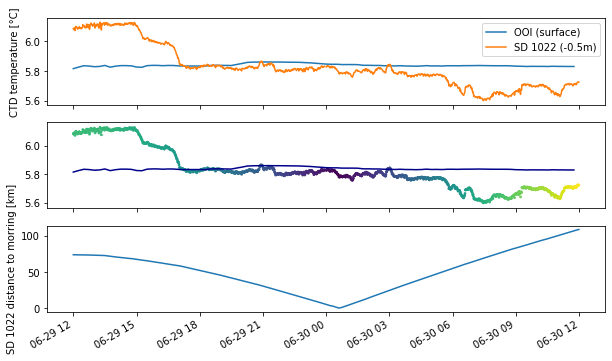

In [8]:
#OOI 1st DATA SET import matplotlib
import matplotlib.cm as cm
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.metrics import r2_score
from scipy.stats import ttest_ind    
    

a_time=OOI.time[2689:2785]
ds_time= DS.time[72720:74160]
z=dist
fig, (ax1,ax2,ax3) =  plt.subplots(3,1,sharex=True,figsize=[10,6])#[15,8]

fig.autofmt_xdate()
ax1.plot(a_time,OOI_ctdtemp, label='OOI (surface)')
ax1.plot(ds_time,SD_ctdtemp, label='SD 1022 (-0.5m)')
ax1.set_ylabel('CTD temperature [°C]')
ax1.legend()

#ax2.scatter(np.array(a_time),OOI_ctdtemp,c=z,s=3, label='OOI (surface)')
ax2.scatter(np.array(ds_time),SD_ctdtemp,c=z,s=3, label='SD 1022 (-0.5m)')
ax2.plot(np.array(a_time),OOI_ctdtemp, label='OOI (surface)', color='darkblue')

ax3.plot(DS.time[72720:74160],dist)
#ax2.set_ylim(-50,5000)
ax3.set_ylabel('SD 1022 distance to morring [km]')

#fig.savefig("SD1022_mooring_CTD_temp_distance.pdf", bbox_inches='tight',transparent=True)

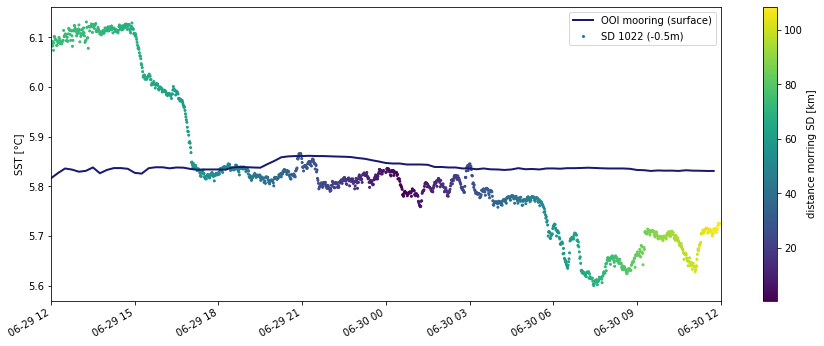

In [8]:
#OOI 2nd DATA SET 
a_time=OOI.time[2689:2785]
ds_time= DS.time[72720:74160]
z=dist
fig, (ax2) =  plt.subplots(1, 1, sharex=True, figsize=[15,6])#[15,8]
fig.autofmt_xdate()
im= ax2.scatter(np.array(ds_time), SD_ctdtemp, c=z, s=4, label='SD 1022 (-0.5m)')
ax2.plot(np.array(a_time), OOI_ctdtemp, label='OOI mooring (surface)', linewidth=2, color='midnightblue')
ax2.set_ylabel('SST [°C]')
ax2.set_xlim(datetime.datetime(2019, 6, 29, 12, 0, 0), datetime.datetime(2019, 6, 30, 12, 0,0))
ax2.legend()
fig.colorbar(im, label= 'distance morring SD [km]')
#fig.savefig("SD1022_mooring_CTD_temp_distance_colorbar.pdf", bbox_inches='tight',transparent=True)

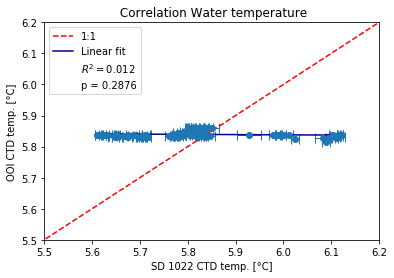

The p value is: 0.2876216516025545


In [33]:
#plt.scatter(SD_ctdtemp_15min,OOI_ctdtemp)
#len(OOI.time[2689:2786])/4
plt.errorbar(SD_ctdtemp_15min,OOI_ctdtemp,fmt='o', xerr= SD_ctdtemp_15min_std,linewidth=1,capsize=5)
plt.ylabel('OOI CTD temp. [°C]')
plt.xlabel('SD 1022 CTD temp. [°C]')
plt.title(' Correlation Water temperature')
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from scipy import stats
import scipy
import matplotlib.patches as mpl_patches

x1= np.array(SD_ctdtemp_15min)
y1= np.array(OOI_ctdtemp)

plt.plot([0,25],[0,25], "r--",label='1:1')

#define function
#creating OLS regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x1,y1)
def linefitline(b):
    return intercept + slope * b
line1=linefitline(x1)

#calculate p-value (probability the null hypothesis is true): 
from scipy.stats import ttest_ind
t, p = ttest_ind(x1,y1)

r2 = r2_score(y1, linefitline(x1))
plt.plot(x1,line1, c = 'darkblue',label='Linear fit')
plt.plot([], [], ' ', label= '$R^2=$'+ str(np.round(r2,decimals=3)))
plt.plot([], [], ' ', label= 'p = '+ str(np.round(p_value,decimals=4)))
plt.legend(loc='best')
plt.xlim(5.5,6.2)
plt.ylim(5.5,6.2)
#plt.savefig("SD1022_OOI_corr_ctdtemp.pdf", bbox_inches='tight')
plt.show()
print('The p value is: ' + str(p_value))

(5.55, 6.15)

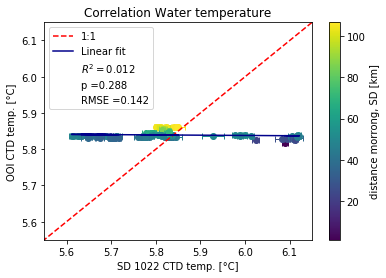

In [6]:
x1= np.array(SD_ctdtemp_15min)
y1= np.array(OOI_ctdtemp)
distance_15min= dist[::15]
SD.plot_scatter_errorbars_color_correlation(x1, y1, distance_15min,
                                            SD_ctdtemp_15min_std, yerro=None, xlabel='SD 1022 CTD temp. [°C]'
                                            , ylabel='OOI CTD temp. [°C]',
                                            cbarlabel='distance morrong, SD [km]'
                                            , title='Correlation Water temperature',capsize1=3)

plt.xlim(5.55,6.15)
plt.ylim(5.55,6.15)
#plt.savefig("SD1022_OOI_corr_ctdtemp_colorbar.pdf", bbox_inches='tight')

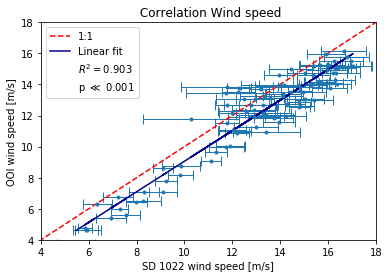

The p value is: 2.178731408953562e-49


In [169]:
plt.errorbar(SD_wind_15min,OOI_wind,fmt='.', xerr= SD_wind_15min_std,linewidth=1,capsize=5)
plt.ylabel('OOI wind speed [m/s]')
plt.xlabel('SD 1022 wind speed [m/s]')
plt.title(' Correlation Wind speed')

from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from scipy import stats
import scipy
import matplotlib.patches as mpl_patches

x1= np.array(SD_wind_15min)
y1= np.array(OOI_wind)

plt.plot([0,25],[0,25], "r--",label='1:1')

#define function
#creating OLS regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x1,y1)
def linefitline(b):
    return intercept + slope * b
line1=linefitline(x1)

#calculate p-value (probability the null hypothesis is true): 
#from scipy.stats import ttest_ind
#t, p = ttest_ind(x1,y1)

r2 = r2_score(y1, linefitline(x1))
plt.plot(x1,line1, c = 'darkblue',label='Linear fit')
plt.plot([], [], ' ', label= '$R^2=$'+ str(np.round(r2,decimals=3)))
plt.plot([], [], ' ', label= 'p $\ll$ 0.001')
plt.legend(loc='best')
plt.xlim(4,18)
plt.ylim(4,18)
#plt.savefig("SD1022_OOI_corr_wind.pdf", bbox_inches='tight')
plt.show()
print('The p value is: ' + str(p_value))

(3, 18)

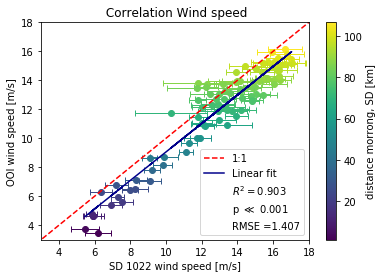

In [9]:
x1= np.array(SD_wind_15min)
y1= np.array(OOI_wind)
SD.plot_scatter_errorbars_color_correlation(x1, y1, distance_15min,
                                            SD_wind_15min_std, yerro=None, xlabel='SD 1022 wind speed [m/s]'
                                            , ylabel='OOI wind speed [m/s]',
                                            cbarlabel='distance morrong, SD [km]'
                                            , title=' Correlation Wind speed', capsize1=3)

plt.xlim(3,18)
plt.ylim(3,18)
#plt.savefig("SD1022_OOI_corr_wind_colorbar.pdf", bbox_inches='tight')

(3, 7)

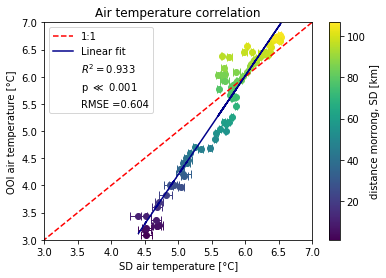

In [11]:
distance_15min= dist[::15]
SD.plot_scatter_errorbars_color_correlation(np.array(SD_airtemp_15min), np.array(OOI_airtemp), distance_15min,
                                            SD_airtemp_15min_std, yerro=None, xlabel='SD air temperature [°C]',
                                            ylabel='OOI air temperature [°C]',
                                            cbarlabel='distance morrong, SD [km]', 
                                            title='Air temperature correlation',capsize1=4)
plt.xlim(3,7)
plt.ylim(3,7)
#plt.savefig("SD1022_OOI_corr_airtemp_colorbar.pdf", bbox_inches='tight')

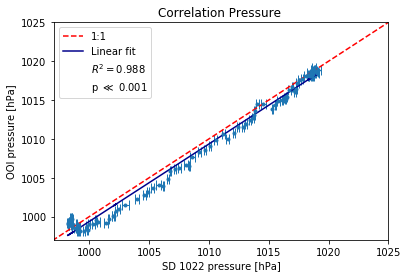

The rsquared value is: 6.4346773644260314e-93


In [87]:
plt.errorbar(SD_pres_15min,OOI_pres,fmt='.', xerr= SD_pres_15min_std,linewidth=1,capsize=5)
plt.ylabel('OOI pressure [hPa]')
plt.xlabel('SD 1022 pressure [hPa]')
plt.title('Correlation Pressure ')

from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from scipy import stats
import scipy 
import matplotlib.patches as mpl_patches

x1= np.array(SD_pres_15min)
y1= np.array(OOI_pres)

plt.plot([0,1500],[0,1500], "r--",label='1:1')

#define function
#creating OLS regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x1,y1)
def linefitline(b):
    return intercept + slope * b
line1=linefitline(x1)

#calculate p-value (probability the null hypothesis is true): 
from scipy.stats import ttest_ind
t, p = ttest_ind(x1,y1)

r2 = r2_score(y1, linefitline(x1))
plt.plot(x1,line1, c = 'darkblue',label='Linear fit')
plt.plot([], [], ' ', label= '$R^2=$'+ str(np.round(r2,decimals=3)))
plt.plot([], [], ' ', label= 'p $\ll$ 0.001')
plt.legend(loc='best')
plt.xlim(997,1025)
plt.ylim(997,1025)
#plt.savefig("SD1022_OOI_corr_pres.pdf", bbox_inches='tight')
plt.show()
print('The rsquared value is: ' + str(p_value))

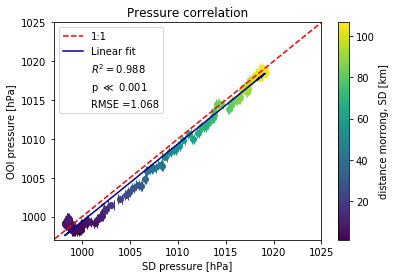

In [13]:
x1= np.array(SD_pres_15min)
y1= np.array(OOI_pres)
distance_15min= dist[::15]
SD.plot_scatter_errorbars_color_correlation(np.array(x1), np.array(y1), distance_15min,
                                            SD_pres_15min_std, yerro=None, xlabel='SD pressure [hPa]',
                                            ylabel='OOI pressure [hPa]',
                                            cbarlabel='distance morrong, SD [km]', 
                                            title='Pressure correlation',capsize1=5)
plt.xlim(997,1025)
plt.ylim(997,1025)

#plt.savefig("SD1022_OOI_corr_pres_colorbar.pdf", bbox_inches='tight')

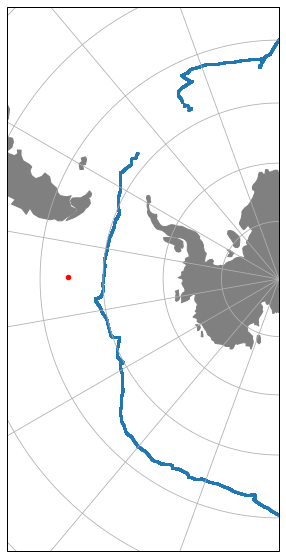

In [7]:
import cartopy
import cartopy.crs as ccrs
import matplotlib as mpl

fig = plt.figure(figsize=[10,10])
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 0, -90, -45], ccrs.PlateCarree())

x= DS.longitude
y=DS.latitude

x_m=-89.3567
y_m=-54.4076

cmap = mpl.cm.Blues
h1=ax.scatter(x,y, s=.5,transform=ccrs.PlateCarree())#, vmin=-40, vmax=60)
h1= ax.scatter(x_m,y_m, s= 20, color='r',transform=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, color='grey')
#plt.title('Sensible heat flux, SD 1020')
#ax.gridlines()
gl = ax.gridlines(draw_labels=False, xlocs=None, ylocs=None)
gl.n_steps = 90
#sm = plt.cm.ScalarMappable(norm=plt.Normalize(np.min(z),np.max(z)))#cmap=cmap,
#sm._A = []
#plt.colorbar(sm,ax=ax,label='Heat flux [$W/m^2$]',shrink=.82)
#plt.savefig("SD1022_Map_path_mooring.pdf", bbox_inches='tight',transparent=True)

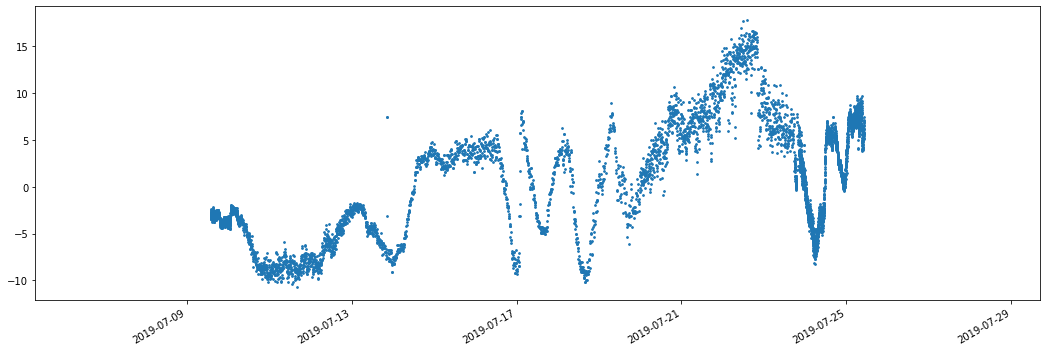

In [84]:

fig = plt.figure(figsize=[18,6])
plt.scatter(np.array(DS.time[87247:110000]), DS.UWND_MEAN[87247:110000], s= 3)
fig.autofmt_xdate()

# Look closer at map to see SSH


In [194]:
#cartopy.crs.Robinson

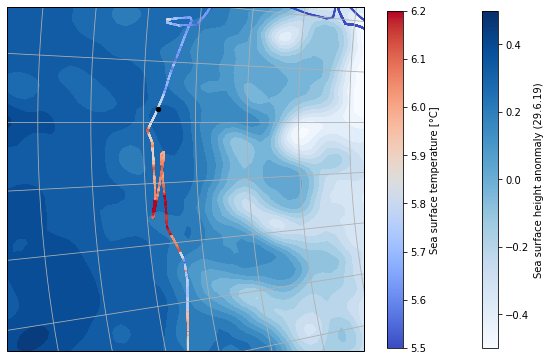

In [13]:
import xarray as xr
import numpy as np 
filepath= 'D:/Studium_der_Physik/M.Sc/Oceanography_Master/Masterthesis/Data/dataset-duacs-nrt-global-merged-allsat-phy-l4_1576143289462.nc'
SSH = xr.open_dataset(filepath)
#np.array(DS.time)[47] # 17.2.19
#SSH.time[179]

import cartopy
import cartopy.crs as ccrs
import matplotlib as mpl

fig= plt.figure(figsize=[10,10])
ax= plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-100, -85, -60, -50], ccrs.PlateCarree())

x= DS.longitude
y= DS.latitude
z= DS.TEMP_CTD_RBR_MEAN

x_m= -89.3567
y_m= -54.4076

cmap= mpl.cm.Blues
ax.add_feature(cartopy.feature.LAND, color='grey')
#plt.title('Sensible heat flux, SD 1020')

gl = ax.gridlines(draw_labels=False, xlocs=None, ylocs=None)
gl.n_steps = 90

###############
x2= SSH.longitude
y2= SSH.latitude
z2= SSH.adt[180]

plt.contourf(x2, y2, z2, 60, transform=ccrs.PlateCarree(), vmin=-0.5, vmax=0.5,cmap= mpl.cm.Blues)
cmap= mpl.cm.Blues
ax.add_feature(cartopy.feature.LAND, color='grey')
sm = plt.cm.ScalarMappable(norm=plt.Normalize(-0.5, 0.5), cmap= mpl.cm.Blues)#cmap=cmap,
sm._A = []

sm2 = plt.cm.ScalarMappable(norm=plt.Normalize(5.5, 6.2), cmap= 'coolwarm')#cmap=cmap,
sm2._A = []
h1= ax.scatter(x, y, s=.5, c=z, transform=ccrs.PlateCarree(), vmin=5.5, vmax=6.2, cmap='coolwarm' )
h1= ax.scatter(x_m, y_m, s= 20, color='k', transform=ccrs.PlateCarree(), cmap='coolwarm' )
#gl = ax.gridlines(draw_labels=False, xlocs=None, ylocs=None)
#gl.n_steps = 90
#sm = plt.cm.ScalarMappable(norm=plt.Normalize(np.min(z),np.max(z)))#cmap=cmap,
#sm._A = []
#plt.colorbar(sm,ax=ax,label='Sea Surface Height (1.1.19.) [m]',shrink=.82)
#h1=ax.scatter(SData.longitude,SData.latitude,s=10,color='k',transform=ccrs.PlateCarree() )
#h1=ax.scatter(xx,yy,s=10,color='r',transform=ccrs.PlateCarree() )
#sm = plt.cm.ScalarMappable(norm=plt.Normalize(np.min(z),np.max(z)))#cmap=cmap,

plt.colorbar(sm, ax=ax, label='Sea surface height anonmaly (29.6.19)', shrink=.62, cmap= mpl.cm.Blues)
plt.colorbar(sm2, ax=ax, label='Sea surface temperature [°C]', shrink=.62, cmap= 'coolwarm')
#plt.savefig("SD1022_Map_mooring_SST_SSH.pdf", bbox_inches='tight',transparent=True)

TypeError: cannot unpack non-iterable AxesSubplot object

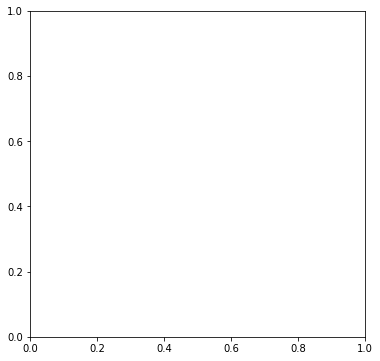

In [14]:
import seaborn as sns
def two_scales(ax1, time, data1, data2, c1, c2, label1, label2, alpha1, alpha2):
    ax2 = ax1.twinx()
    ax1.plot(time, data1, color=c1, alpha= alpha1)
    ax1.set_xlabel('')
    ax1.set_ylabel(label1, color = c1, alpha= alpha1)
    ax2.plot(time, data2, color=c2, alpha= alpha2)
    ax2.set_ylabel(label2, color=c2, alpha= alpha2)
    return ax1, ax2
l = np.arange(0,5797, 96)

OOI_SST_since2_6=OOI.sea_surface_temperature[25:]
OOI_SST_1day=[]
for i in l:
    OOI_SST_1day.append(np.nanmean(OOI_SST_since2_6[i:i+95]))
    
fig, (ax1, ax2) = plt.subplots(1,1,sharex=True,figsize=[6,6])
x2= SSH.longitude
y2= SSH.latitude
x_m=-89.3567
y_m=-54.4076
x_d=np.zeros(len(x2))
#plt.plot(SSH.time,SSH.adt[:,109,1082])
two_scales(ax1, time, data1, data2, c1, c2, label1, label2, alpha1, alpha2)

In [15]:
l= np.arange(0, 5791, 96)
OOI_time_cut= OOI.time[25:5816]#
l= np.arange(0, len(OOI_time_cut), 96)
OOI_cut= OOI.sea_surface_temperature[25:5816]
OOI_SST_1day= []
for i in l:
    OOI_SST_1day.append(np.nanmean(OOI_cut[i:i+95]))
    

In [17]:
SSH.adt

<xarray.DataArray 'adt' (time: 213, latitude: 169, longitude: 1440)>
[51835680 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 2019-01-01 2019-01-02 ... 2019-08-01
  * latitude   (latitude) float32 -81.875 -81.625 -81.375 ... -40.125 -39.875
  * longitude  (longitude) float32 0.125 0.375 0.625 ... 359.375 359.625 359.875
Attributes:
    comment:        The absolute dynamic topography is the sea surface height...
    grid_mapping:   crs
    long_name:      Absolute dynamic topography
    standard_name:  sea_surface_height_above_geoid
    units:          m
    _ChunkSizes:    [ 1 50 50]

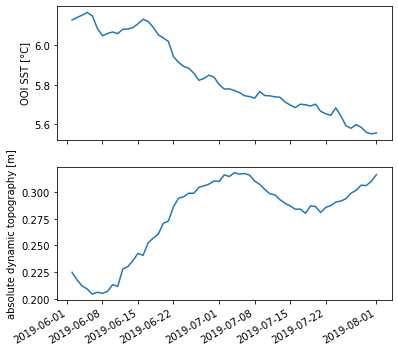

In [25]:
#plt.plot(SSH.time[152:213],SSH.adt[152:213,109,1082])
#time= SSH.time[152:213]
#data1= OOI_SST_1day

fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=[6,6])

ax1.plot(SSH.time[152:213], OOI_SST_1day)
ax1.set_ylabel('OOI SST [°C]')
ax2.plot(SSH.time[152:213], SSH.adt[152:213,109,1082])
ax2.set_ylabel('absolute dynamic topography [m]')
fig.autofmt_xdate()
fig.savefig("OOI_SSH.pdf", bbox_inches='tight')

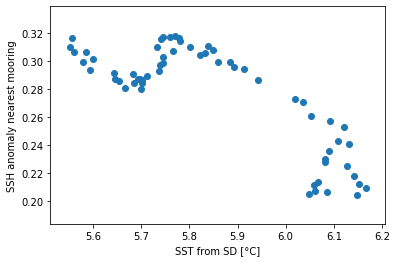

In [26]:
plt.scatter(OOI_SST_1day, SSH.adt[152:213,109,1082])
plt.ylabel('SSH anomaly nearest mooring')
plt.xlabel('SST from SD [°C]')
plt.savefig("OOI_SSH_scatter.pdf", bbox_inches='tight')

In [228]:
import xarray as xr
import numpy as np 
filepath= 'D:/Studium_der_Physik/M.Sc/Oceanography_Master/Masterthesis/Data/dataset-duacs-nrt-global-merged-allsat-phy-l4_1576143289462.nc'
SSH = xr.open_dataset(filepath)

# Decorrelation lengthscale

In [123]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(SD_ctdtemp_5min)
plot_acf?

NameError: name 'SD_ctdtemp_5min' is not defined

In [63]:
SD_airtemp= DS.TEMP_AIR_MEAN[72720:74160]
SD_ctdtemp= DS.TEMP_CTD_RBR_MEAN[72720:74160]
SD_wind=SD.wind(DS.UWND_MEAN,DS.VWND_MEAN)
SD_wind=np.array(SD_wind[72720:74160])
SD_pres=DS.BARO_PRES_MEAN[72720:74160]

#interpolate SD data to 1min reslution
#vwind_int= np.array(DS.VWND_MEAN)
#nans, x= nan_helper(vwind_int)
#vwind_int[nans]= np.interp(x(nans), x(~nans), vwind_int[~nans])

OOI_airtemp=OOI.air_temperature[2689:2785]
OOI_ctdtemp=OOI.sea_surface_temperature[2689:2785]
OOI_wind=OOI.met_relwind_speed[2689:2785]
OOI_pres=OOI.barometric_pressure[2689:2785]
OOI_time=OOI.time[2689:2785]


(array([-144, -143, -142, -141, -140, -139, -138, -137, -136, -135, -134,
        -133, -132, -131, -130, -129, -128, -127, -126, -125, -124, -123,
        -122, -121, -120, -119, -118, -117, -116, -115, -114, -113, -112,
        -111, -110, -109, -108, -107, -106, -105, -104, -103, -102, -101,
        -100,  -99,  -98,  -97,  -96,  -95,  -94,  -93,  -92,  -91,  -90,
         -89,  -88,  -87,  -86,  -85,  -84,  -83,  -82,  -81,  -80,  -79,
         -78,  -77,  -76,  -75,  -74,  -73,  -72,  -71,  -70,  -69,  -68,
         -67,  -66,  -65,  -64,  -63,  -62,  -61,  -60,  -59,  -58,  -57,
         -56,  -55,  -54,  -53,  -52,  -51,  -50,  -49,  -48,  -47,  -46,
         -45,  -44,  -43,  -42,  -41,  -40,  -39,  -38,  -37,  -36,  -35,
         -34,  -33,  -32,  -31,  -30,  -29,  -28,  -27,  -26,  -25,  -24,
         -23,  -22,  -21,  -20,  -19,  -18,  -17,  -16,  -15,  -14,  -13,
         -12,  -11,  -10,   -9,   -8,   -7,   -6,   -5,   -4,   -3,   -2,
          -1,    0,    1,    2,    3, 

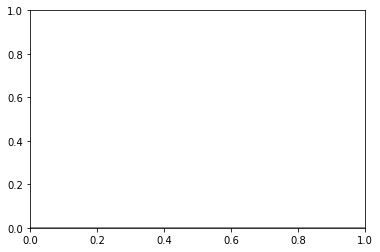

In [93]:
#plot_acf(SD_wind)
plt.acorr(SD_wind, maxlags=144)
#np.where(SD_wind== np.nan)

# SENSIBLE Heatflux

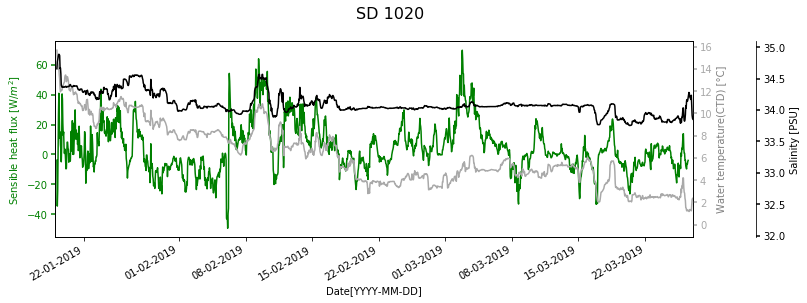

In [21]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)
import datetime
fig, host = plt.subplots()

fig.subplots_adjust(right=1.6)

par1 = host.twinx()
par2 = host.twinx()
c1='green'
c2='darkgrey'
par2.spines["right"].set_position(("axes", 1.1))
par2.spines["right"].set_visible(True)

x= DS.time
p1, = host.plot(x,heat_sensible, label="sensible heat",color='green')#,color=p1.get_color())
#p12= host.plot(x, heat_latent)
p2, = par1.plot(x,DS.TEMP_CTD_MEAN , label="CTD",color= c2
               )
p3, = par2.plot(x,DS.SAL_MEAN, "k-", label="Salinity")

#host.set_xlabel("Distance")
host.set_ylabel("Sensible heat flux [W/$m^2$]",color=c1)
par1.set_ylabel("Water temperature(CTD) [°C]")
par2.set_ylabel("Salinity [PSU]")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color('grey')#p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', color='green')
#par1.tick_params(axis='y', colors='grey')
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
#host.tick_params(axis='x', **tkw)

host.set_xlabel("Date[YYYY-MM-DD]")
lines = [p1, p2, p3]
fig.suptitle('SD 1020', fontsize=16,x=.9,y=1)
host.set_xlim([datetime.date(2019, 1, 19), datetime.date(2019, 3, 27)])
#plt.grid(color='grey', linestyle='-', linewidth=.5)
#host.legend(lines, [l.get_label() for l in lines])
host.tick_params(axis='y',colors=c1,**tkw)
par1.tick_params(axis='y', colors=c2, **tkw)
fig.autofmt_xdate()

from matplotlib.dates import DateFormatter
formatter = DateFormatter('%d-%m-%Y')
plt.gcf().axes[0].xaxis.set_major_formatter(formatter)


plt.show()
#fig.savefig("SD1020_sensibleheat.pdf", bbox_inches='tight')

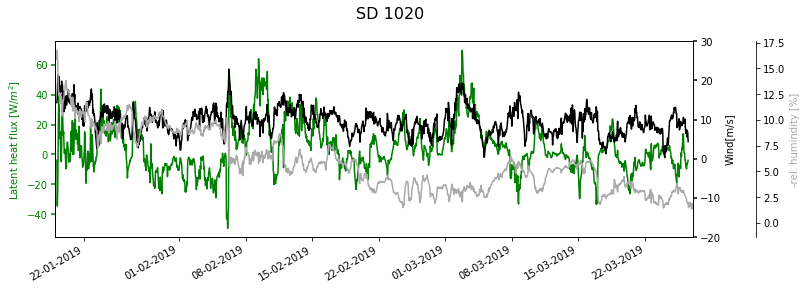

In [24]:
fig, host = plt.subplots()

fig.subplots_adjust(right=1.6)

par1 = host.twinx()
par2 = host.twinx()

par2.spines["right"].set_position(("axes", 1.1))
par2.spines["right"].set_visible(True)

x= DS.time
y2=wind
y3= DS.TEMP_AIR_MEAN

c1='green'
c3='darkgrey'
c2='k'
c4='red'


p1, = host.plot(x,heat_sensible, label="latent heat",color=c1)#,color=p1.get_color())
#p12= host.plot(x, heat_latent)
p2, = par1.plot(x,y2, label="Pressure",color= c2)
p3, = par2.plot(x,y3, label="rel. humidity",color=c3)

#host.set_xlabel("Date[YYY -MM-DD]")
host.set_ylabel("Latent heat flux [W/$m^2$]",color=c1)

par1.set_ylabel("Wind[m/s]",color=c2)
par1.set_ylim(-20,30)
par2.set_ylabel("-rel. humindity [%]",color=c3)
#par2.set_ylim(-120,-50)
#par2.yaxis.label.set_color(c3)

tkw = dict(size=4, width=1.5)

lines = [p1, p2, p3]
fig.suptitle('SD 1020', fontsize=16,x=.9,y=1)

host.set_xlim([datetime.date(2019, 1, 19), datetime.date(2019, 3, 27)])
#plt.grid(color='grey', linestyle='-', linewidth=.5)
#host.legend(lines, [l.get_label() for l in lines])
host.tick_params(axis='y',colors=c1,**tkw)
par1.tick_params(axis='y', colors=c2, **tkw)

fig.autofmt_xdate()
from matplotlib.dates import DateFormatter
formatter = DateFormatter('%d-%m-%Y')
plt.gcf().axes[0].xaxis.set_major_formatter(formatter)

plt.show()
#fig.savefig("SD1020_latentheat.pdf", bbox_inches='tight')

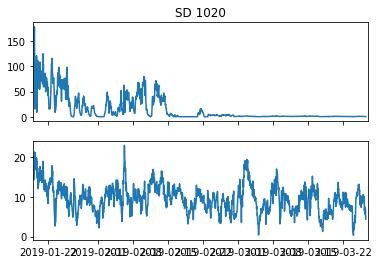

In [124]:

x1=DS.time

y1=heat_latent_new
y2= wind
y3=DS.RH_MEAN

#fig, host = plt.subplots(2,1)
fig.subplots_adjust(right=1.6)


f, (ax1, ax2) = plt.subplots(2,1,sharex=True) #sharey=True)

ax1.plot(x1, y1)
ax1.set_title('SD 1020')
ax2.plot(x1, y2)

ax1.set_xlim([datetime.date(2019, 1, 19), datetime.date(2019, 3, 27)])
fig.autofmt_xdate(bottom=0.2, rotation=45, ha='right', which=None)

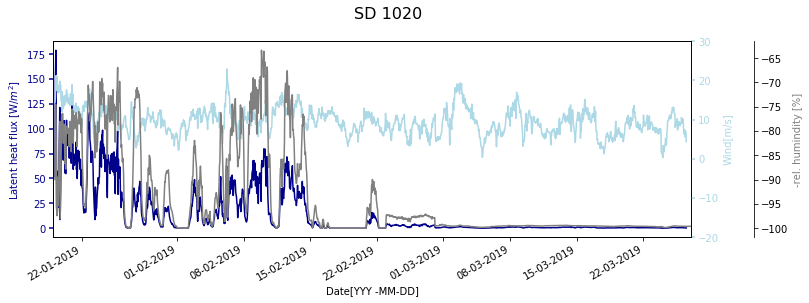

In [27]:
fig, host = plt.subplots()

fig.subplots_adjust(right=1.6)

par1 = host.twinx()
par2 = host.twinx()

par2.spines["right"].set_position(("axes", 1.1))
par2.spines["right"].set_visible(True)

x= DS.time
y2=wind
y3= DS.RH_MEAN

c1='darkblue'
c2='lightblue'
c3='grey'
c4='red'


p1, = host.plot(x,heat_latent_new, label="latent heat",color=c1)#,color=p1.get_color())
#p12= host.plot(x, heat_latent)
p2, = par1.plot(x,y2, label="Pressure",color= c2)
p3, = par2.plot(x,-y3, label="rel. humidity",color=c3)

host.set_xlabel("Date[YYY -MM-DD]")
host.set_ylabel("Latent heat flux [W/$m^2$]",color=c1)

par1.set_ylabel("Wind[m/s]",color=c2)
par1.set_ylim(-20,30)
par2.set_ylabel("-rel. humindity [%]",color=c3)
#par2.set_ylim(-120,-50)
#par2.yaxis.label.set_color(c3)

tkw = dict(size=4, width=1.5)

lines = [p1, p2, p3]
fig.suptitle('SD 1020', fontsize=16,x=.9,y=1)

host.set_xlim([datetime.date(2019, 1, 19), datetime.date(2019, 3, 27)])
#plt.grid(color='grey', linestyle='-', linewidth=.5)
#host.legend(lines, [l.get_label() for l in lines])
host.tick_params(axis='y',colors=c1,**tkw)
par1.tick_params(axis='y', colors=c2, **tkw)

fig.autofmt_xdate()
from matplotlib.dates import DateFormatter
formatter = DateFormatter('%d-%m-%Y')
plt.gcf().axes[0].xaxis.set_major_formatter(formatter)


plt.show()

fig.savefig("SD1020_latentheat_details.pdf", bbox_inches='tight')

# LATENT HEAT FLUX 

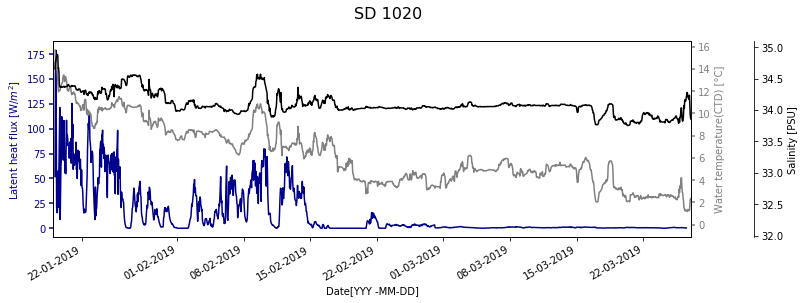

In [28]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)
import datetime
fig, host = plt.subplots()

fig.subplots_adjust(right=1.6)

par1 = host.twinx()
par2 = host.twinx()

par2.spines["right"].set_position(("axes", 1.1))
par2.spines["right"].set_visible(True)

x= DS.time
c1='darkblue'
c2='grey'
c3='k'
c4='red'
p1, = host.plot(x,heat_latent_new, label="latent heat",color=c1)#,color=p1.get_color())
#p12= host.plot(x, heat_latent)
p2, = par1.plot(x,DS.TEMP_CTD_MEAN , label="CTD",color= c2)
p3, = par2.plot(x,DS.SAL_MEAN, label="Salinity",color=c3)

host.set_xlabel("Date[YYY -MM-DD]")
host.set_ylabel("Latent heat flux [W/$m^2$]",color=c1)
par1.set_ylabel("Water temperature(CTD) [°C]",color=c2)
par2.set_ylabel("Salinity [PSU]",color=c3)
#par2.yaxis.label.set_color(c3)

tkw = dict(size=4, width=1.5)

lines = [p1, p2, p3]
fig.suptitle('SD 1020', fontsize=16,x=.9,y=1)

host.set_xlim([datetime.date(2019, 1, 19), datetime.date(2019, 3, 27)])
#plt.grid(color='grey', linestyle='-', linewidth=.5)
#host.legend(lines, [l.get_label() for l in lines])
host.tick_params(axis='y',colors=c1,**tkw)
par1.tick_params(axis='y', colors=c2, **tkw)

from matplotlib.dates import DateFormatter
formatter = DateFormatter('%d-%m-%Y')
plt.gcf().axes[0].xaxis.set_major_formatter(formatter)

fig.autofmt_xdate()
plt.show()
#fig.savefig("SD1020_latentheat_details2.pdf", bbox_inches='tight')

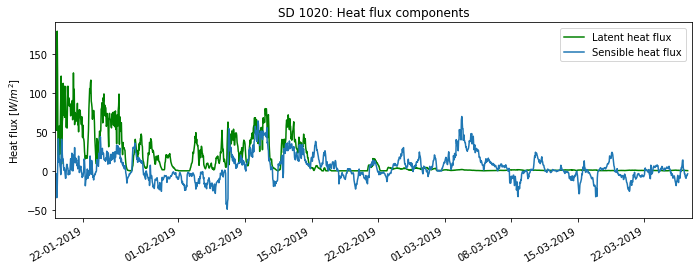

In [29]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)
import datetime
fig, host = plt.subplots()

fig.subplots_adjust(right=1.6)
x= DS.time
#p1, = host.plot(x,heat_latent, label="latent heat",color='green')#,color=p1.get_color())
#p12= host.plot(x, sensible_heat)
#p2, = par1.plot(x,heat_sensible , "r-", label="CTD")#,color= 'grey')
#p3, = par2.plot(x,Par_Wm2, "k-", label="Salinity",color= 'grey')

plt.plot(x,heat_latent_new,label='Latent heat flux',color='green')
plt.plot(x,heat_sensible,label='Sensible heat flux', )
#plt.plot(x,Par_Wm2)
host.set_xlim([datetime.date(2019, 1, 19), datetime.date(2019, 3, 27)])
fig.autofmt_xdate()
host.set_ylabel("Heat flux [$W/m^2$]")
plt.legend(bbox_to_anchor=(0.99,.97), loc='upper right', borderaxespad=0.)
plt.title('SD 1020: Heat flux components')

from matplotlib.dates import DateFormatter
formatter = DateFormatter('%d-%m-%Y')
plt.gcf().axes[0].xaxis.set_major_formatter(formatter)

plt.show()
#fig.savefig("SD1020_heatflux_components.pdf", bbox_inches='tight')

In [89]:
def make_circle(): 
    import matplotlib.path as mpath
    import numpy as np
    theta=np.linspace(0,2*np.pi,100)
    center, radius= [0.5,0.5],0.5
    verts=np.vstack([np.sin(theta),np.cos(theta)]).T
    circle=mpath.Path(verts*radius+center)
    return circle

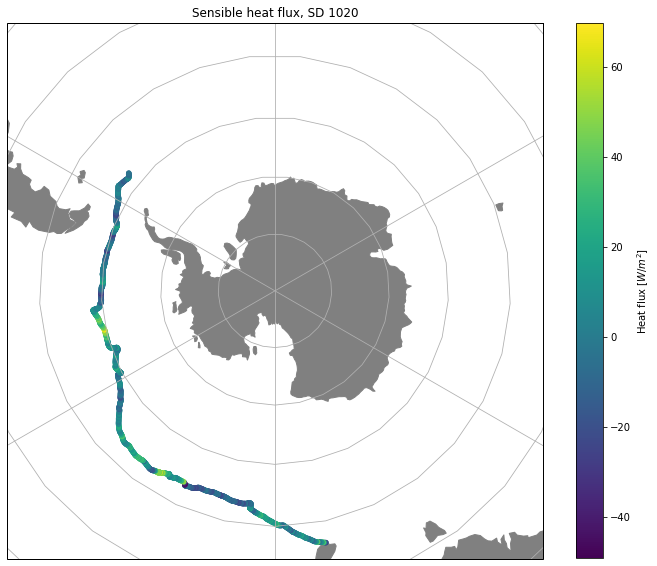

In [33]:
import cartopy
import matplotlib as mpl

fig = plt.figure(figsize=[12,12])
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -45], ccrs.PlateCarree())

x= DS.longitude
y=DS.latitude

z = heat_sensible
cmap = mpl.cm.Blues
h1=ax.scatter(x,y,s=20,c=z,transform=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, color='grey')
plt.title('Sensible heat flux, SD 1020')
ax.gridlines()

sm = plt.cm.ScalarMappable(norm=plt.Normalize(np.min(z),np.max(z)))#cmap=cmap,
sm._A = []
plt.colorbar(sm,ax=ax,label='Heat flux [$W/m^2$]',shrink=.82)

#fig.savefig("SD1020_sensibleheat_Map.pdf", bbox_inches='tight')

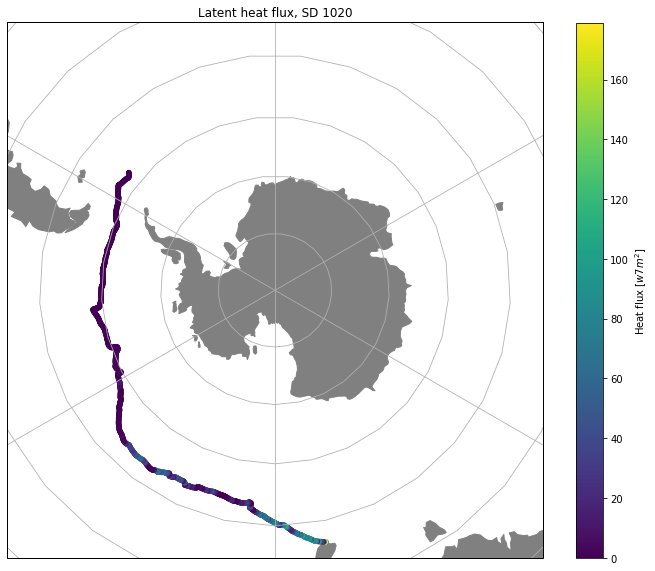

In [34]:
import cartopy

fig = plt.figure(figsize=[12,12])
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -45], ccrs.PlateCarree())

x= DS.longitude
y=DS.latitude

z = heat_latent_new
h1=ax.scatter(x,y,s=20,c=z,transform=ccrs.PlateCarree())#,cmap= cmap)
plt.title('Latent heat flux, SD 1020')
ax.add_feature(cartopy.feature.LAND, color='grey')
ax.gridlines()
#cmap = mpl.cm.Blues
sm = plt.cm.ScalarMappable(norm=plt.Normalize(np.min(z),np.max(z)))#cmap=cmap,
sm._A = []
plt.colorbar(sm,ax=ax,label='Heat flux [$w7m^2$]',shrink=.82)

#fig.savefig("SD1020_latentheat_Map.pdf", bbox_inches='tight')

In [6]:
import cartopy
fig = plt.figure(figsize=[12,12])
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -45], ccrs.PlateCarree())
x= DS.longitude
y=DS.latitude
z = DS.TEMP_CTD_MEAN
h1=ax.scatter(x,y,s=20,c=z,transform=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, color='grey')
plt.title('Surface water temperature, SD 1020')
ax.gridlines()
sm = plt.cm.ScalarMappable(norm=plt.Normalize(np.min(DS.TEMP_AIR_MEAN),np.max(DS.TEMP_AIR_MEAN)))#cmap=cmap,
sm._A = []
plt.colorbar(sm,ax=ax,label='Temperature[°C]',shrink=.82)
#plt.ColorbarBase.set_label('no')
#fig.savefig("SD1020_CTD_Temp_Map.pdf", bbox_inches='tight')

NameError: name 'ccrs' is not defined

<Figure size 864x864 with 0 Axes>

Text(0, 0.5, 'abs. temperature difference air and sea water [K]')

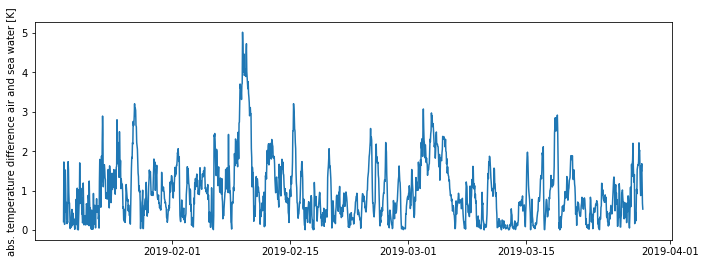

In [58]:
import numpy as np 
fig, ax = plt.subplots()
fig.subplots_adjust(right=1.6)


x= DS.time
#p1, = host.plot(x,heat_latent, label="latent heat",color='green')#,color=p1.get_color())
#p12= host.plot(x, sensible_heat)
#p2, = par1.plot(x,heat_sensible , "r-", label="CTD")#,color= 'grey')
#p3, = par2.plot(x,Par_Wm2, "k-", label="Salinity",color= 'grey')
abs_temp_diff=np.sqrt((DS.TEMP_CTD_MEAN-DS.TEMP_AIR_MEAN)**2)
plt.plot(x,abs_temp_diff)
ax.set_ylabel("abs. temperature difference air and sea water [K]")

In [1]:
import xarray as xr
import numpy as np

##Download ERA5 reanaysis data
import cdsapi
import certifi
import urllib3
http = urllib3.PoolManager(
    cert_reqs='CERT_REQUIRED',
    ca_certs=certifi.where()
)

c = cdsapi.Client(timeout=75,url= 'https://cds.climate.copernicus.eu/api/v2',
key= '24891:44aabe89-39a3-4335-8bb4-be18ae02be29',verify=1)

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',
        'variable': [
            '10m_u_component_of_wind', '10m_v_component_of_wind', '2m_temperature',
            'sea_surface_temperature', 'surface_pressure',
        ],
        'year': '2019',
        'month': [
            '05', '06', '07',
            '08', '09',
        ],
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'area'          : [-46, -180, -67, 180], # North, West, South, East. Default: global
    },
    'downloadERA5_SD1022.nc')

2020-03-10 20:49:00,108 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2020-03-10 20:49:00,872 INFO Request is queued
2020-03-10 20:49:02,018 INFO Request is running


KeyboardInterrupt: 

In [ ]:
#Comparison to ERA5: interpolated Sd data 1min resolution 

In [7]:
import xarray as xr
import numpy as np 
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
filepath4= 'D:/Studium_der_Physik/M.Sc/Oceanography_Master/Masterthesis/Data/downloadERA5_SD1022.nc'
ERA5_22 = xr.open_dataset(filepath4)

#'downloadERA5_SD1022.nc'
ERA5_22.time

<xarray.DataArray 'time' (time: 3672)>
array(['2019-05-01T00:00:00.000000000', '2019-05-01T01:00:00.000000000',
       '2019-05-01T02:00:00.000000000', ..., '2019-09-30T21:00:00.000000000',
       '2019-09-30T22:00:00.000000000', '2019-09-30T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2019-05-01 ... 2019-09-30T23:00:00
Attributes:
    long_name:  time